## INGENIAS - Grupo 6. EDA de Tablas de Proyecto

## Carga de datos

In [458]:
#Importamos librerías con las que se van a trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn


In [459]:
personas=pd.read_excel('../datos/Personas_ENMODO18.xlsx') #Cargamos la Base de Datos "PERSONAS"

In [460]:
viajes=pd.read_excel('../datos/Viajes_ENMODO18.xlsx') #Cargamos la Base de Datos "VIAJES"

In [461]:
hogar=pd.read_excel('../datos/Hogar_ENMODO18.xlsx') #Cargamos la Base de Datos "HOGAR"

## Transformación y análisis de los datos

In [462]:
#Exploramos el tamaño de cada una de las bases de datos
print(f'El tamaño de la base personas es: {personas.shape}')
print(f'El tamaño de la base viajes es: {viajes.shape}')
print(f'El tamaño de la base hogar es: {hogar.shape}')

El tamaño de la base personas es: (42971, 28)
El tamaño de la base viajes es: (59452, 28)
El tamaño de la base hogar es: (16667, 41)


Encontramos que los datasets cuentan con distintas cantidades de datos, por lo cual se realiza un análisis de las primeras diez filas del dataset.

In [463]:
personas.head(10) #Visualizamos las primeras 10 filas dataset "PERSONAS"

,id_hogar,id_persona,partido,nombre_partido,IV_2_edad,IV_4_sexo,IV_6_relacionConJefeDeHogar,IV_7_dificultad,IV_9_cursaActualmente,IV_10_nivel_cursando,...,V_7_trabaja_como,V_8_forma_aporte,V_9_ambito_laboral,V_9b_ambito_laboral_otro,V_10_cobertura,V_11_lugar_atencion,V_12_AM,VI_2_viajo_ayer,VI_3_motivos_no_viajo_ayer,PONDERA
0,1,1,6119,BRANDSEN,59.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,187
1,1,2,6119,BRANDSEN,64.0,1,2,7,2,0,...,2,1,1,0,1,1,1,1,0,503
2,1,3,6119,BRANDSEN,82.0,2,4,3,2,0,...,0,0,0,0,1,1,2,2,1,205
3,2,1,6119,BRANDSEN,25.0,2,1,7,2,0,...,0,0,0,0,5,1,2,1,0,464
4,2,2,6119,BRANDSEN,7.0,2,3,7,1,3,...,0,0,0,0,5,1,2,2,1,232
5,2,3,6119,BRANDSEN,5.0,1,3,7,1,2,...,0,0,0,0,5,1,2,2,1,310
6,3,1,6119,BRANDSEN,59.0,1,1,7,2,0,...,0,0,0,0,1,4,2,1,0,462
7,4,1,6119,BRANDSEN,46.0,1,1,7,2,0,...,2,0,2,0,1,2,1,1,0,575
8,4,2,6119,BRANDSEN,14.0,1,3,7,1,4,...,0,0,0,0,1,2,2,1,0,646
9,5,1,6119,BRANDSEN,68.0,1,1,7,2,0,...,0,0,0,0,1,1,2,2,1,216


In [464]:
viajes.head(10) #Visualizamos las primeras 10 filas dataset "VIAJES"

,id_hogar,id_persona,id_viaje,VII_2_activida_en_el_origen,VII_3_activida_en_el_destino,BH_NBH,motivo,VII_9_veces_por_semana_viaja,VIII_35_tarifa_combinada,jur_origen,...,modo_des,radio_origen,radio_destino,PONDERA,cantidad_etapas,tipo_viaje,menos_2_cuadras,Inluye_bici,viaja_rmba,distancia_viaje_km
0,1,2,1,1,2,BH,2,5,0,6,...,5,61191009.0,61191001.0,503,1,PBA,0,no,1,4.387573
1,1,2,2,2,1,BH,2,5,0,6,...,5,61191001.0,61191009.0,503,1,PBA,0,no,1,4.387573
2,2,1,1,1,3,BH,3,88,0,6,...,4,61190702.0,61190302.0,464,1,PBA,0,no,1,11.885378
3,2,1,2,3,1,BH,3,88,0,6,...,4,61190302.0,61190702.0,464,1,PBA,0,no,1,11.885378
4,3,1,1,1,7,BH,7,88,0,6,...,3,61190702.0,61191007.0,462,1,PBA,0,no,1,12.408573
5,3,1,2,7,9,NBH,9,88,0,6,...,2,61190301.0,61190301.0,462,1,PBA,1,no,1,-
6,3,1,3,9,1,BH,9,88,0,6,...,3,61191007.0,61190702.0,462,1,PBA,0,no,1,12.390517
7,4,1,1,1,2,BH,2,6,2,6,...,5,61190702.0,62700807.0,575,1,PBA,0,no,1,55.397514
8,4,1,2,2,1,BH,2,6,2,6,...,5,NaN,61190702.0,575,1,PBA,0,no,1,-
9,4,2,1,1,4,BH,4,5,2,6,...,5,61190702.0,61190308.0,646,1,PBA,0,no,1,11.705717


In [465]:
hogar.head(10) #Visualizamos las primeras 10 filas dataset "HOGAR"

,id_hogar,PROVINCIA_HOGAR,PARTIDO_hogar,RADIO_CENSAL_hogar,II_1_a_vivienda,II_1_b_lugar_vivienda,II_2_cantidadHabitaciones,II_3_bano,II_6_personasHabituales,II_7_personasTemporal,...,III_11_moto_1_propietario,III_12_moto_1_uso,III_11_moto_2_propietario,III_12_moto_2_uso,III_11_moto_3_propietario,III_12_moto_3_uso,III_11_moto_4_propietario,III_12_moto_4_uso,III_14_tieneBicis,III_14_a_cuantasBicis
0,1,6,6119,61190702,1,22,2,1,3,88,...,0,0,0,0,0,0,0,0,2,0
1,2,6,6119,61190702,1,6,3,1,3,88,...,0,0,0,0,0,0,0,0,1,2
2,3,6,6119,61190702,1,22,2,1,1,88,...,0,0,0,0,0,0,0,0,2,0
3,4,6,6119,61190702,1,22,4,1,2,88,...,0,0,0,0,0,0,0,0,2,0
4,5,6,6119,61190702,1,22,4,1,4,88,...,1,2,0,0,0,0,0,0,1,1
5,6,6,6119,61190702,2,22,2,1,5,88,...,0,0,0,0,0,0,0,0,1,1
6,7,6,6119,61190702,1,22,2,1,4,88,...,0,0,0,0,0,0,0,0,1,3
7,8,6,6119,61190702,1,22,3,1,2,88,...,0,0,0,0,0,0,0,0,1,2
8,9,6,6119,61190702,1,6,4,1,7,88,...,1,2,0,0,0,0,0,0,1,1
9,10,6,6119,61190702,1,6,2,1,5,88,...,0,0,0,0,0,0,0,0,1,3


Remombramos variables para clarificar la lectura y análisis.

In [466]:
personas.columns #Visualizamos nombres originales dataset "PERSONAS"

Index(['id_hogar', 'id_persona', 'partido', 'nombre_partido', 'IV_2_edad',
       'IV_4_sexo', 'IV_6_relacionConJefeDeHogar', 'IV_7_dificultad',
       'IV_9_cursaActualmente', 'IV_10_nivel_cursando',
       'IV_11_ambito_cursando', 'IV_12_nivel_aprobado', 'Trabaja_Si_No (0=SD)',
       'V_4_situacion_laboral', 'V_5_porque_no_trabajo',
       'V_5b_porque_no_trabajo_otro', 'V_6_porque_no_tiene_empleo',
       'V_6b_porque_no_tiene_empleo_otro', 'V_7_trabaja_como',
       'V_8_forma_aporte', 'V_9_ambito_laboral', 'V_9b_ambito_laboral_otro',
       'V_10_cobertura', 'V_11_lugar_atencion', 'V_12_AM', 'VI_2_viajo_ayer',
       'VI_3_motivos_no_viajo_ayer', 'PONDERA'],
      dtype='object')

In [467]:
personas.rename(columns={'IV_2_edad':'edad','IV_4_sexo':'sexo','IV_6_relacionConJefeDeHogar':'relacion_con_jefe_de_hogar','IV_7_dificultad':'dificultad','IV_9_cursaActualmente':'cursa_actualmente','IV_10_nivel_cursando':'nivel_cursando','IV_11_ambito_cursando':'ambito_cursando','IV_12_nivel_aprobado':'nivel_aprobado','V_4_situacion_laboral':'situacion_laboral','V_5_porque_no_trabajo':'por_que_no_trabajo','V_5b_porque_no_trabajo_otro':'por_que_no_trabajo_otro','V_6_porque_no_tiene_empleo':'por_que_no_tiene_empleo_remunerado','V_6b_porque_no_tiene_empleo_otro':'por_que_no_tiene_empleo_otro','V_7_trabaja_como':'trabaja_como','V_8_forma_aporte':'forma_aporte','V_9_ambito_laboral':'ambito_laboral','V_9b_ambito_laboral_otro':'ambito_laboral_otro','V_10_cobertura':'cobertura','V_11_lugar_atencion':'lugar_atencion','V_12_AM':'licencia_de_conducir','VI_2_viajo_ayer':'viajo_ayer','VI_3_motivos_no_viajo_ayer':'motivos_no_viajo_ayer'}, inplace=True)
 
#Cambiamos nombre de columnas de "PERSONAS"

In [468]:
personas.columns #Verificamos el cambio de nombres

Index(['id_hogar', 'id_persona', 'partido', 'nombre_partido', 'edad', 'sexo',
       'relacion_con_jefe_de_hogar', 'dificultad', 'cursa_actualmente',
       'nivel_cursando', 'ambito_cursando', 'nivel_aprobado',
       'Trabaja_Si_No (0=SD)', 'situacion_laboral', 'por_que_no_trabajo',
       'por_que_no_trabajo_otro', 'por_que_no_tiene_empleo_remunerado',
       'por_que_no_tiene_empleo_otro', 'trabaja_como', 'forma_aporte',
       'ambito_laboral', 'ambito_laboral_otro', 'cobertura', 'lugar_atencion',
       'licencia_de_conducir', 'viajo_ayer', 'motivos_no_viajo_ayer',
       'PONDERA'],
      dtype='object')

In [469]:
viajes.columns #Visualizamos nombres originales dataset "VIAJES"

Index(['id_hogar', 'id_persona', 'id_viaje', 'VII_2_activida_en_el_origen',
       'VII_3_activida_en_el_destino', 'BH_NBH', 'motivo',
       'VII_9_veces_por_semana_viaja', 'VIII_35_tarifa_combinada',
       'jur_origen', 'jur_destino', 'partido_origen_viaje',
       'partido_destino_viaje', 'cod_partido_origen', 'cod_partido_destino',
       'hora_inicio', 'hora_final', 'duracion_minutos', 'modo_des',
       'radio_origen', 'radio_destino', 'PONDERA', 'cantidad_etapas',
       'tipo_viaje', 'menos_2_cuadras', 'Inluye_bici', 'viaja_rmba',
       'distancia_viaje_km'],
      dtype='object')

In [470]:
viajes.rename(columns={'VIII_35_tarifa_combinada':'tarifa_combinada','VII_2_activida_en_el_origen':'actividad_en_el_origen','VII_3_activida_en_el_destino':'actividad_en_el_destino','VII_9_veces_por_semana_viaja':'veces_por_semana_viaja'}, inplace=True)
#Cambiamos nombre de columnas de "VIAJES"

In [471]:
viajes.columns #Verificamos el cambio de "VIAJES"

Index(['id_hogar', 'id_persona', 'id_viaje', 'actividad_en_el_origen',
       'actividad_en_el_destino', 'BH_NBH', 'motivo', 'veces_por_semana_viaja',
       'tarifa_combinada', 'jur_origen', 'jur_destino', 'partido_origen_viaje',
       'partido_destino_viaje', 'cod_partido_origen', 'cod_partido_destino',
       'hora_inicio', 'hora_final', 'duracion_minutos', 'modo_des',
       'radio_origen', 'radio_destino', 'PONDERA', 'cantidad_etapas',
       'tipo_viaje', 'menos_2_cuadras', 'Inluye_bici', 'viaja_rmba',
       'distancia_viaje_km'],
      dtype='object')

In [472]:
hogar.columns #Visualizamos nombres originales del dataset "HOGAR"

Index(['id_hogar', 'PROVINCIA_HOGAR', 'PARTIDO_hogar', 'RADIO_CENSAL_hogar',
       'II_1_a_vivienda', 'II_1_b_lugar_vivienda', 'II_2_cantidadHabitaciones',
       'II_3_bano', 'II_6_personasHabituales', 'II_7_personasTemporal',
       'III_1_ tieneVehiculosMotorizados',
       'III_1_a_cuantosVehiculosMotorizados', 'III_2_cocheras',
       'III_3_vehiculo_1_tipo', 'III_4_vehiculo_1_propietario',
       'III_5_vehiculo_1_uso', 'III_8_vehiculo_1_combustible',
       'III_3_vehiculo_2_tipo', 'III_4_vehiculo_2_propietario',
       'III_5_vehiculo_2_uso', 'III_8_vehiculo_2_combustible',
       'III_3_vehiculo_3_tipo', 'III_4_vehiculo_3_propietario',
       'III_5_vehiculo_3_uso', 'III_8_vehiculo_3_combustible',
       'III_3_vehiculo_4_tipo', 'III_4_vehiculo_4_propietario',
       'III_5_vehiculo_4_uso', 'III_8_vehiculo_4_combustible',
       'III_9_tieneMotos', 'III_9_a_cuantasMotos', 'III_11_moto_1_propietario',
       'III_12_moto_1_uso', 'III_11_moto_2_propietario', 'III_12_moto_2_uso'

In [473]:
hogar.rename(columns={'PROVINCIA_HOGAR':'provincia_hogar','PARTIDO_hogar':'partido_hogar','RADIO_CENSAL_hogar':'radio_censal_hogar','II_1_a_vivienda':'vivienda','II_1_b_lugar_vivienda':'lugar_vivienda','II_2_cantidadHabitaciones':'cantidad_habitaciones','II_3_bano':'bano','II_6_personasHabituales':'personas_habituales','II_7_personasTemporal':'personas_temporal','III_1_ tieneVehiculosMotorizados':'tiene_vehiculos_motorizados','III_1_a_cuantosVehiculosMotorizados':'cuantos_vehiculos_motorizados','III_2_cocheras':'cocheras','III_3_vehiculo_1_tipo':'vehiculo_1_tipo','III_4_vehiculo_1_propietario':'vehiculo_1_propietario','III_5_vehiculo_1_uso':'vehiculo_1_uso','III_8_vehiculo_1_combustible':'vehiculo_1_combustible','III_3_vehiculo_2_tipo':'vehiculo_2_tipo','III_4_vehiculo_2_propietario':'vehiculo_2_propietario','III_5_vehiculo_2_uso':'vehiculo_2_uso','III_8_vehiculo_2_combustible':'vehiculo_2_combustible','III_3_vehiculo_3_tipo':'vehiculo_3_tipo','III_4_vehiculo_3_propietario':'vehiculo_3_propietario','III_5_vehiculo_3_uso':'vehiculo_3_uso','III_8_vehiculo_3_combustible':'vehiculo_3_combustible','III_3_vehiculo_4_tipo':'vehiculo_4_tipo', 'III_5_vehiculo_4_uso':'vehiculo_4_uso','III_8_vehiculo_4_combustible':'vehiculo_4_combustible','III_4_vehiculo_4_propietario':'vehiculo_4_propietario','III_9_tieneMotos': 'tiene_motos','III_9_a_cuantasMotos':'cuantas_motos','III_11_moto_1_propietario':'moto_1_propietario','III_12_moto_1_uso':'moto_1_uso','III_11_moto_2_propietario':'moto_2_propietario','III_12_moto_2_uso':'moto_2_uso','III_11_moto_3_propietario':'moto_3_propietario','III_12_moto_3_uso':'moto_3_uso','III_11_moto_4_propietario':'moto_4_propietario','III_12_moto_4_uso':'moto_4_uso','III_14_tieneBicis':'tiene_bicis','III_14_a_cuantasBicis':'cuantas_bicis','VIII_35_tarifa_combinada':'tarifa_combinada','Inluye_bici':'inluye_bici','Trabaja_Si_No (0=SD)':'trabaja_si_no (0=SD)'}, inplace=True)


In [474]:
hogar.columns #Verificamos el cambio de "HOGAR".

Index(['id_hogar', 'provincia_hogar', 'partido_hogar', 'radio_censal_hogar',
       'vivienda', 'lugar_vivienda', 'cantidad_habitaciones', 'bano',
       'personas_habituales', 'personas_temporal',
       'tiene_vehiculos_motorizados', 'cuantos_vehiculos_motorizados',
       'cocheras', 'vehiculo_1_tipo', 'vehiculo_1_propietario',
       'vehiculo_1_uso', 'vehiculo_1_combustible', 'vehiculo_2_tipo',
       'vehiculo_2_propietario', 'vehiculo_2_uso', 'vehiculo_2_combustible',
       'vehiculo_3_tipo', 'vehiculo_3_propietario', 'vehiculo_3_uso',
       'vehiculo_3_combustible', 'vehiculo_4_tipo', 'vehiculo_4_propietario',
       'vehiculo_4_uso', 'vehiculo_4_combustible', 'tiene_motos',
       'cuantas_motos', 'moto_1_propietario', 'moto_1_uso',
       'moto_2_propietario', 'moto_2_uso', 'moto_3_propietario', 'moto_3_uso',
       'moto_4_propietario', 'moto_4_uso', 'tiene_bicis', 'cuantas_bicis'],
      dtype='object')

Analizamos los tipos de datos de cada variable.

In [475]:
personas.dtypes #Chequeamos el tipo de datos que contine "PERSONAS"

id_hogar                                int64
id_persona                              int64
partido                                 int64
nombre_partido                         object
edad                                  float64
sexo                                    int64
relacion_con_jefe_de_hogar              int64
dificultad                             object
cursa_actualmente                       int64
nivel_cursando                          int64
ambito_cursando                         int64
nivel_aprobado                          int64
Trabaja_Si_No (0=SD)                    int64
situacion_laboral                       int64
por_que_no_trabajo                      int64
por_que_no_trabajo_otro                object
por_que_no_tiene_empleo_remunerado      int64
por_que_no_tiene_empleo_otro           object
trabaja_como                            int64
forma_aporte                            int64
ambito_laboral                          int64
ambito_laboral_otro               

In [476]:
viajes.dtypes #Chequeamos el tipo de datos que contine "VIAJES"

id_hogar                     int64
id_persona                   int64
id_viaje                     int64
actividad_en_el_origen       int64
actividad_en_el_destino      int64
BH_NBH                      object
motivo                       int64
veces_por_semana_viaja       int64
tarifa_combinada             int64
jur_origen                   int64
jur_destino                  int64
partido_origen_viaje        object
partido_destino_viaje       object
cod_partido_origen           int64
cod_partido_destino          int64
hora_inicio                 object
hora_final                  object
duracion_minutos            object
modo_des                     int64
radio_origen               float64
radio_destino              float64
PONDERA                      int64
cantidad_etapas              int64
tipo_viaje                  object
menos_2_cuadras              int64
Inluye_bici                 object
viaja_rmba                   int64
distancia_viaje_km          object
dtype: object

In [477]:
hogar.dtypes #Chequeamos el tipo de datos que contine "HOGAR"

id_hogar                         int64
provincia_hogar                  int64
partido_hogar                    int64
radio_censal_hogar               int64
vivienda                         int64
lugar_vivienda                   int64
cantidad_habitaciones            int64
bano                             int64
personas_habituales              int64
personas_temporal                int64
tiene_vehiculos_motorizados      int64
cuantos_vehiculos_motorizados    int64
cocheras                         int64
vehiculo_1_tipo                  int64
vehiculo_1_propietario           int64
vehiculo_1_uso                   int64
vehiculo_1_combustible           int64
vehiculo_2_tipo                  int64
vehiculo_2_propietario           int64
vehiculo_2_uso                   int64
vehiculo_2_combustible           int64
vehiculo_3_tipo                  int64
vehiculo_3_propietario           int64
vehiculo_3_uso                   int64
vehiculo_3_combustible           int64
vehiculo_4_tipo          

## Análisis de valores faltantes

Evaluamos cuántos valores nulos hay en cada tabla por columna.

In [478]:
personas.isnull().sum().sort_values(ascending = False) #Verificamos los valores nulos para tabla de "PERSONAS"

edad                                  14
id_hogar                               0
por_que_no_trabajo_otro                0
motivos_no_viajo_ayer                  0
viajo_ayer                             0
licencia_de_conducir                   0
lugar_atencion                         0
cobertura                              0
ambito_laboral_otro                    0
ambito_laboral                         0
forma_aporte                           0
trabaja_como                           0
por_que_no_tiene_empleo_otro           0
por_que_no_tiene_empleo_remunerado     0
por_que_no_trabajo                     0
id_persona                             0
situacion_laboral                      0
Trabaja_Si_No (0=SD)                   0
nivel_aprobado                         0
ambito_cursando                        0
nivel_cursando                         0
cursa_actualmente                      0
dificultad                             0
relacion_con_jefe_de_hogar             0
sexo            

In [479]:
hogar.isnull().sum().sort_values(ascending = False) #Verificamos los valores nulos para tabla de "HOGAR"

id_hogar                         0
vehiculo_3_tipo                  0
vehiculo_3_uso                   0
vehiculo_3_combustible           0
vehiculo_4_tipo                  0
vehiculo_4_propietario           0
vehiculo_4_uso                   0
vehiculo_4_combustible           0
tiene_motos                      0
cuantas_motos                    0
moto_1_propietario               0
moto_1_uso                       0
moto_2_propietario               0
moto_2_uso                       0
moto_3_propietario               0
moto_3_uso                       0
moto_4_propietario               0
moto_4_uso                       0
tiene_bicis                      0
vehiculo_3_propietario           0
vehiculo_2_combustible           0
provincia_hogar                  0
vehiculo_2_uso                   0
partido_hogar                    0
radio_censal_hogar               0
vivienda                         0
lugar_vivienda                   0
cantidad_habitaciones            0
bano                

In [480]:
viajes.isnull().sum().sort_values(ascending = False) #Verificamos los valores nulos para tabla de "VIAJE"

radio_destino              436
radio_origen               262
hora_final                   1
id_hogar                     0
id_persona                   0
viaja_rmba                   0
Inluye_bici                  0
menos_2_cuadras              0
tipo_viaje                   0
cantidad_etapas              0
PONDERA                      0
modo_des                     0
duracion_minutos             0
hora_inicio                  0
cod_partido_destino          0
cod_partido_origen           0
partido_destino_viaje        0
partido_origen_viaje         0
jur_destino                  0
jur_origen                   0
tarifa_combinada             0
veces_por_semana_viaja       0
motivo                       0
BH_NBH                       0
actividad_en_el_destino      0
actividad_en_el_origen       0
id_viaje                     0
distancia_viaje_km           0
dtype: int64

Dado que contamos con datos nulos en las tablas de personas y viajes, vemos qué proporción representan esos datos.

In [481]:
personas.isna().sum()/personas.shape[0]*100 #Determinamos el porcentaje de datos nulos en la tabla "PERSONAS"

id_hogar                              0.00000
id_persona                            0.00000
partido                               0.00000
nombre_partido                        0.00000
edad                                  0.03258
sexo                                  0.00000
relacion_con_jefe_de_hogar            0.00000
dificultad                            0.00000
cursa_actualmente                     0.00000
nivel_cursando                        0.00000
ambito_cursando                       0.00000
nivel_aprobado                        0.00000
Trabaja_Si_No (0=SD)                  0.00000
situacion_laboral                     0.00000
por_que_no_trabajo                    0.00000
por_que_no_trabajo_otro               0.00000
por_que_no_tiene_empleo_remunerado    0.00000
por_que_no_tiene_empleo_otro          0.00000
trabaja_como                          0.00000
forma_aporte                          0.00000
ambito_laboral                        0.00000
ambito_laboral_otro               

In [482]:
viajes.isna().sum()/personas.shape[0]*100 #Determinamos el porcentaje de datos nulos en la tabla "PERSONAS"

id_hogar                   0.000000
id_persona                 0.000000
id_viaje                   0.000000
actividad_en_el_origen     0.000000
actividad_en_el_destino    0.000000
BH_NBH                     0.000000
motivo                     0.000000
veces_por_semana_viaja     0.000000
tarifa_combinada           0.000000
jur_origen                 0.000000
jur_destino                0.000000
partido_origen_viaje       0.000000
partido_destino_viaje      0.000000
cod_partido_origen         0.000000
cod_partido_destino        0.000000
hora_inicio                0.000000
hora_final                 0.002327
duracion_minutos           0.000000
modo_des                   0.000000
radio_origen               0.609714
radio_destino              1.014638
PONDERA                    0.000000
cantidad_etapas            0.000000
tipo_viaje                 0.000000
menos_2_cuadras            0.000000
Inluye_bici                0.000000
viaja_rmba                 0.000000
distancia_viaje_km         0

Dado que la variable "EDAD" presenta valores faltantes, hacemos un análisis de su significado e incidencia, para tomar una decisión.

In [483]:
personas[personas.isna().any(axis=1)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
146,46,5,6648,PRESIDENTE PERON,NaN,1,3,7,2,0,...,0,0,0,0,0,0,0,2,1,402
273,86,4,6648,PRESIDENTE PERON,NaN,2,3,7,2,0,...,0,0,0,0,0,0,0,2,1,358
7914,2544,8,6028,ALMIRANTE BROWN,NaN,2,4,7,2,0,...,0,0,0,0,0,0,0,2,1,282
10191,3336,7,6539,MERLO,NaN,1,3,7,2,0,...,0,0,0,0,1,2,2,2,9,251
11430,3727,6,6532,MERCEDES,NaN,2,3,7,2,0,...,0,0,0,0,0,0,0,2,9,228
21866,7472,3,6427,LA MATANZA,NaN,2,3,1,2,0,...,0,0,0,0,5,1,2,2,1,317
22231,7601,3,6427,LA MATANZA,NaN,1,3,7,2,0,...,0,0,0,0,0,0,0,2,1,445
22317,7631,3,6427,LA MATANZA,NaN,1,3,7,2,0,...,0,0,0,0,5,4,2,2,1,355
22373,7647,5,6427,LA MATANZA,NaN,1,3,7,2,0,...,0,0,0,0,0,0,0,2,1,363
27524,9794,3,6028,ALMIRANTE BROWN,NaN,1,3,7,2,0,...,0,0,0,0,0,0,0,2,1,220


Filtramos todas aquellas personas que tienen entre 0 y 3 años.

In [484]:
rango_min= 0
rango_max= 3

edad_bebes = personas[(personas['edad']>= rango_min) & (personas['edad']<=rango_max)]
edad_bebes


,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
45,14,4,6119,BRANDSEN,0.0,1,3,7,2,0,...,0,0,0,0,0,0,2,2,22,429
59,18,4,6119,BRANDSEN,2.0,2,3,2,2,0,...,0,0,0,0,1,2,2,2,1,307
60,18,5,6119,BRANDSEN,0.0,2,3,7,2,0,...,0,0,0,0,1,2,2,2,1,307
89,29,4,6648,PRESIDENTE PERON,3.0,2,3,7,2,0,...,0,0,0,0,5,1,2,2,1,245
98,31,3,6648,PRESIDENTE PERON,3.0,2,3,7,1,2,...,0,0,0,0,1,2,2,1,0,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42678,16423,5,6091,BERAZATEGUI,3.0,2,3,7,1,1,...,0,0,0,0,2,2,2,2,1,313
42682,16425,3,6091,BERAZATEGUI,2.0,1,3,7,1,1,...,0,0,0,0,2,2,2,2,2,487
42722,16453,2,6091,BERAZATEGUI,3.0,1,3,7,1,1,...,0,0,0,0,1,1,2,2,1,384
42787,16497,2,2013,COMUNA 13,2.0,2,3,7,2,0,...,0,0,0,0,2,2,2,2,1,343


Del análisis anterior se puede observar que la mayoría de las personas que presentan datos nulos, son hijos de los jefes de familia, personas que no tienen estudios, ni relación con el mundo laboral y en la mayoría de los casos no tienen necesidad de viajar. Por lo antes mencionado, se podría presumir que se trataría de infantes de muy corta edad. Para cotejar la hipótesis, se filtraron aquellas personas que tienen entre 0 y 3 años, observando que presentan características muy similares a las de los datos nulos.

Del dataset que contiene sólo las personas entre 0 y 3 años, calculamos la media de las edades.

In [485]:
media_bebes = round(edad_bebes['edad'].mean()) #Utilizamos el round para que lo aproxime al entero más cercano
media_bebes

2

Asignamos el valor calculado anteriormente a los valores nulos.

In [486]:
from sklearn.impute import SimpleImputer #Importamos la función simpleimputer de scikit learn

In [487]:
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=media_bebes)

In [488]:
personas['edad']= imputer.fit_transform(personas[['edad']])

Comprobamos que no quedan valores nulos.

In [489]:
personas.isnull().sum().sort_values(ascending = False) #Verificamos los valores nulos para tabla de "PERSONAS"

id_hogar                              0
id_persona                            0
motivos_no_viajo_ayer                 0
viajo_ayer                            0
licencia_de_conducir                  0
lugar_atencion                        0
cobertura                             0
ambito_laboral_otro                   0
ambito_laboral                        0
forma_aporte                          0
trabaja_como                          0
por_que_no_tiene_empleo_otro          0
por_que_no_tiene_empleo_remunerado    0
por_que_no_trabajo_otro               0
por_que_no_trabajo                    0
situacion_laboral                     0
Trabaja_Si_No (0=SD)                  0
nivel_aprobado                        0
ambito_cursando                       0
nivel_cursando                        0
cursa_actualmente                     0
dificultad                            0
relacion_con_jefe_de_hogar            0
sexo                                  0
edad                                  0


In [490]:
personas.iloc[273] #Comprobamos que haya sido reemplazado por el valor asignado

id_hogar                                            86
id_persona                                           4
partido                                           6648
nombre_partido                        PRESIDENTE PERON
edad                                               2.0
sexo                                                 2
relacion_con_jefe_de_hogar                           3
dificultad                                           7
cursa_actualmente                                    2
nivel_cursando                                       0
ambito_cursando                                      0
nivel_aprobado                                       1
Trabaja_Si_No (0=SD)                                 0
situacion_laboral                                    0
por_que_no_trabajo                                   0
por_que_no_trabajo_otro                              0
por_que_no_tiene_empleo_remunerado                   0
por_que_no_tiene_empleo_otro                         0
trabaja_co

Dado que los valores nulos correspondientes a la TABLA VIAJES, se trata de las variables "radio_origen" y "radio_destino" que indican un código de radio censal que se corresponde con la georreferencia del origen del viaje y destino de viajo, y es información que hemos considerado que no será analizada en nuestro proyecto, se procede a eliminarla.

In [491]:
viajes.drop(['radio_origen', 'radio_destino'], axis=1, inplace=True)

In [492]:
viajes.columns #Comprobamos que hayan sido eliminadas

Index(['id_hogar', 'id_persona', 'id_viaje', 'actividad_en_el_origen',
       'actividad_en_el_destino', 'BH_NBH', 'motivo', 'veces_por_semana_viaja',
       'tarifa_combinada', 'jur_origen', 'jur_destino', 'partido_origen_viaje',
       'partido_destino_viaje', 'cod_partido_origen', 'cod_partido_destino',
       'hora_inicio', 'hora_final', 'duracion_minutos', 'modo_des', 'PONDERA',
       'cantidad_etapas', 'tipo_viaje', 'menos_2_cuadras', 'Inluye_bici',
       'viaja_rmba', 'distancia_viaje_km'],
      dtype='object')

Comprobamos el porcentaje de aquellos datos nulos a los cuales se les ha asignado el valor cero.

In [493]:
(viajes == 0).sum()/viajes.shape[0]*100

id_hogar                    0.000000
id_persona                  0.000000
id_viaje                    0.000000
actividad_en_el_origen      0.000000
actividad_en_el_destino     0.000000
BH_NBH                      0.000000
motivo                      0.000000
veces_por_semana_viaja      0.000000
tarifa_combinada           72.086725
jur_origen                  0.000000
jur_destino                 0.000000
partido_origen_viaje        0.000000
partido_destino_viaje       0.000000
cod_partido_origen          0.000000
cod_partido_destino         0.000000
hora_inicio                 0.124470
hora_final                  0.000000
duracion_minutos            0.161475
modo_des                    0.000000
PONDERA                     0.000000
cantidad_etapas             0.000000
tipo_viaje                  0.000000
menos_2_cuadras            92.360223
Inluye_bici                 0.000000
viaja_rmba                  0.000000
distancia_viaje_km          0.000000
dtype: float64

In [494]:
(personas == 0).sum()/personas.shape[0]*100

id_hogar                               0.000000
id_persona                             0.000000
partido                                0.000000
nombre_partido                         0.000000
edad                                   0.719090
sexo                                   0.000000
relacion_con_jefe_de_hogar             0.000000
dificultad                             0.000000
cursa_actualmente                      0.000000
nivel_cursando                        69.304880
ambito_cursando                       69.311861
nivel_aprobado                         0.812176
Trabaja_Si_No (0=SD)                   1.028601
situacion_laboral                      3.507016
por_que_no_trabajo                    99.183170
por_que_no_trabajo_otro                0.000000
por_que_no_tiene_empleo_remunerado    43.517721
por_que_no_tiene_empleo_otro           0.000000
trabaja_como                          62.002281
forma_aporte                          63.040190
ambito_laboral                        62

In [495]:
(hogar == 0).sum()/hogar.shape[0]*100

id_hogar                          0.000000
provincia_hogar                   0.000000
partido_hogar                     0.000000
radio_censal_hogar                0.000000
vivienda                          0.000000
lugar_vivienda                    0.000000
cantidad_habitaciones             0.000000
bano                              0.000000
personas_habituales               0.000000
personas_temporal                 0.000000
tiene_vehiculos_motorizados       0.000000
cuantos_vehiculos_motorizados    62.110758
cocheras                          0.000000
vehiculo_1_tipo                  62.110758
vehiculo_1_propietario           62.110758
vehiculo_1_uso                   62.110758
vehiculo_1_combustible           62.110758
vehiculo_2_tipo                  96.724066
vehiculo_2_propietario           96.724066
vehiculo_2_uso                   96.724066
vehiculo_2_combustible           96.724066
vehiculo_3_tipo                  99.610008
vehiculo_3_propietario           99.610008
vehiculo_3_

**Tratamos los valores nulos del dataset "PERSONAS"**

Trabajamos con la variable "edad".

In [496]:
 personas[(personas['edad']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
45,14,4,6119,BRANDSEN,0.0,1,3,7,2,0,...,0,0,0,0,0,0,2,2,22,429
60,18,5,6119,BRANDSEN,0.0,2,3,7,2,0,...,0,0,0,0,1,2,2,2,1,307
128,41,4,6260,ESTEBAN ECHEVERRIA,0.0,2,3,7,2,0,...,0,0,0,0,5,1,2,2,1,349
225,70,5,6266,EXALTACION DE LA CRUZ,0.0,1,4,7,2,0,...,0,0,0,0,1,2,2,2,22,398
585,175,6,6778,SAN VICENTE,0.0,2,3,7,2,0,...,0,0,0,0,5,1,2,2,1,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41860,16003,1,6434,LANUS,0.0,2,4,7,2,0,...,0,0,0,0,1,1,2,2,22,216
41969,16044,4,6760,SAN MIGUEL,0.0,2,3,7,2,0,...,0,0,0,0,0,0,2,2,1,388
42400,16234,3,2005,COMUNA 5,0.0,2,3,7,2,0,...,0,0,0,0,1,2,2,2,22,277
42418,16240,4,2005,COMUNA 5,0.0,2,4,7,2,0,...,0,0,0,0,5,4,2,2,1,277


Posiblemente no sea un valor nulo, al parecer son personas que tienen entre 0 y 1 año, no trabajan, ni estudian, no se trasladan, y son hijos u otro pariente.

Trabajamos con la variable "nivel_cursando".

In [497]:
personas['cursa_actualmente'].value_counts()/personas.shape[0]*100

2    69.30488
1    30.69512
Name: cursa_actualmente, dtype: float64

De esta manera comprobamos que todas las personas que no cursan es igual a la cantidad de personas que no respondieron que nivel estan cursando actualmente, NO ES DATO NULO

Trabajamos con la variable "ambito_cursando".

Podría suponerse que al igual que el caso anterior se trata de las personas que no cursan, sin embargo este porcentaje difiere por muy poco, por lo que analizamos esos casos particulares. 

In [498]:
filtro_ambito_cursando = personas[(personas['nivel_cursando']!=0) & (personas['ambito_cursando']==0)]

In [499]:
filtro_ambito_cursando 

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
2932,924,2,6260,ESTEBAN ECHEVERRIA,54.0,1,3,7,1,5,...,2,1,2,0,2,2,1,2,10,166
17721,5866,1,6568,MORON,20.0,2,1,7,1,3,...,2,1,2,0,2,2,2,1,0,420
17844,5917,1,6568,MORON,29.0,1,1,7,1,2,...,2,1,2,0,1,2,1,1,0,649


In [500]:
filtro_ambito_cursando[['edad','nivel_cursando', 'ambito_cursando', 'cursa_actualmente']]

,edad,nivel_cursando,ambito_cursando,cursa_actualmente
2932,54.0,5,0,1
17721,20.0,3,0,1
17844,29.0,2,0,1


2- Jardín de infantes, 3-Primario y 5-Terciario. Son personas que cursan, pero no especifican el ambito. Además hace referencia a que una personas de 29 años cursa el jardín de infantes. Son datos que no tienen mucho sentido. PODRIAN ELIMINARSE

In [501]:
personas = personas.drop(personas[(personas['nivel_cursando']!=0) & (personas['ambito_cursando']==0)].index)

In [502]:
personas[(personas['nivel_cursando']!=0) & (personas['ambito_cursando']==0)] #Comprobamos que han sido eliminados

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Trabajamos con la variable "nivel_aprobado".

In [503]:
personas[(personas['nivel_aprobado']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
364,115,1,6648,PRESIDENTE PERON,27.0,2,1,7,1,9,...,0,0,0,0,1,2,2,1,0,437
531,163,1,6778,SAN VICENTE,47.0,2,1,7,1,9,...,0,0,0,0,1,1,2,1,0,346
596,178,1,6778,SAN VICENTE,32.0,2,1,7,1,9,...,2,0,2,0,5,1,2,1,0,632
711,221,1,6497,LUJAN,44.0,2,1,7,1,22,...,0,0,0,0,5,1,2,2,1,256
957,295,2,6497,LUJAN,30.0,2,2,1,1,22,...,2,1,1,0,1,2,2,1,0,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42070,16084,1,6756,SAN ISIDRO,77.0,2,1,7,1,9,...,0,0,0,0,1,1,2,2,10,282
42106,16100,1,6756,SAN ISIDRO,28.0,1,1,7,1,22,...,0,0,0,0,1,2,2,2,1,290
42107,16100,2,6756,SAN ISIDRO,27.0,1,2,7,1,22,...,2,1,2,0,1,2,2,2,2,290
42139,16112,1,6756,SAN ISIDRO,25.0,2,3,7,1,9,...,0,0,0,0,5,1,2,2,9,330


Evidentemente son datos nulos, que por el momento no tienen niguna correlacion, dado que solo representan 0,81%, PODRIAN ELIMINARSE

In [504]:
personas = personas.drop(personas[(personas['nivel_aprobado']==0)].index)

In [505]:
personas[(personas['nivel_aprobado']==0)] #Comprobamos que han sido eliminados

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Trabajamos con la variable "Trabaja_Si_No (0=SD)".

In [506]:
personas[(personas['Trabaja_Si_No (0=SD)']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
19,7,2,6119,BRANDSEN,20.0,1,3,7,1,6,...,0,0,0,0,0,0,0,2,10,300
65,21,2,6119,BRANDSEN,40.0,2,8,7,2,0,...,0,0,0,0,0,0,0,2,1,223
66,21,3,6119,BRANDSEN,48.0,1,8,7,2,0,...,0,0,0,0,0,0,0,2,1,227
67,21,4,6119,BRANDSEN,21.0,1,4,7,1,6,...,0,0,0,0,0,0,0,2,1,280
68,21,5,6119,BRANDSEN,20.0,1,4,7,2,0,...,0,0,0,0,0,0,0,2,1,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41961,16042,4,6760,SAN MIGUEL,23.0,1,3,7,2,0,...,0,0,0,0,0,0,0,2,1,290
42113,16103,2,6756,SAN ISIDRO,47.0,1,8,7,2,0,...,0,0,0,0,0,0,0,2,2,293
42115,16103,4,6756,SAN ISIDRO,45.0,2,8,7,2,0,...,0,0,0,0,0,0,0,2,9,334
42149,16116,2,6756,SAN ISIDRO,48.0,1,2,2,2,0,...,0,0,0,0,0,0,0,2,2,359


In [507]:
personas[(personas['Trabaja_Si_No (0=SD)']==0)& (personas['situacion_laboral']==0) &(personas['edad']<18)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
69,21,6,6119,BRANDSEN,16.0,1,4,7,1,4,...,0,0,0,0,0,0,0,2,1,286
70,21,7,6119,BRANDSEN,15.0,1,4,7,1,4,...,0,0,0,0,0,0,2,2,1,286
146,46,5,6648,PRESIDENTE PERON,2.0,1,3,7,2,0,...,0,0,0,0,0,0,0,2,1,402
273,86,4,6648,PRESIDENTE PERON,2.0,2,3,7,2,0,...,0,0,0,0,0,0,0,2,1,358
556,168,5,6778,SAN VICENTE,16.0,2,4,7,1,4,...,0,0,0,0,0,0,0,2,1,193
1366,425,2,6525,MARCOS PAZ,17.0,1,4,7,1,4,...,0,0,0,0,0,0,0,2,9,232
1381,428,3,6525,MARCOS PAZ,17.0,2,4,7,1,4,...,0,0,0,0,0,0,0,2,1,241
1671,523,4,6252,ESCOBAR,17.0,1,3,7,1,3,...,0,0,0,0,0,0,0,2,1,217
1681,525,4,6252,ESCOBAR,16.0,1,3,7,1,4,...,0,0,0,0,0,0,0,2,22,217
2118,673,3,6638,PILAR,15.0,1,3,7,1,4,...,0,0,0,0,0,0,2,2,22,178


Evidentemente son datos nulos, que por el momento no tienen ninguna correlación, dado que solo representan 1,03%, PODRIAN ELIMINARSE. Optamos por preservar 37 registros en los cuales se puede asumir que por ser menores de edad y no tener una condición laboral definida, puede tratarse de personas que no trabajan.

1° Cambiamos 0 por 2 (no trabaja) para estos 37 registros.

In [508]:
condicion_no_trabaja =(personas['Trabaja_Si_No (0=SD)']==0)& (personas['situacion_laboral']==0) &(personas['edad']<18)

In [509]:
personas.loc[condicion_no_trabaja, 'Trabaja_Si_No (0=SD)'] = 2

In [510]:
personas[(personas['Trabaja_Si_No (0=SD)']==0)& (personas['situacion_laboral']==0) &(personas['edad']<18)] #Corroboramos la modificación

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


2° Eliminamos los datos realmente nulos.

In [511]:
personas = personas.drop(personas[(personas['Trabaja_Si_No (0=SD)']==0)].index)

In [512]:
personas[(personas['Trabaja_Si_No (0=SD)']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Corroboramos que ya no existen.

Trabajamos con la variable "situacion_laboral".

In [513]:
personas[(personas['situacion_laboral']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
45,14,4,6119,BRANDSEN,0.0,1,3,7,2,0,...,0,0,0,0,0,0,2,2,22,429
69,21,6,6119,BRANDSEN,16.0,1,4,7,1,4,...,0,0,0,0,0,0,0,2,1,286
70,21,7,6119,BRANDSEN,15.0,1,4,7,1,4,...,0,0,0,0,0,0,2,2,1,286
71,21,8,6119,BRANDSEN,11.0,2,4,7,1,4,...,0,0,0,0,0,0,2,2,1,269
89,29,4,6648,PRESIDENTE PERON,3.0,2,3,7,2,0,...,0,0,0,0,5,1,2,2,1,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42295,16184,3,6756,SAN ISIDRO,3.0,1,4,7,2,0,...,0,0,0,0,0,0,2,2,1,346
42313,16195,2,2001,COMUNA 1,1.0,2,3,7,2,0,...,0,0,0,0,0,0,2,2,22,731
42317,16197,1,6756,SAN ISIDRO,3.0,1,4,7,2,0,...,0,0,0,0,0,0,2,2,22,344
42334,16204,3,2001,COMUNA 1,7.0,2,3,7,1,3,...,0,0,0,0,0,0,2,2,1,891


In [514]:
personas[(personas['situacion_laboral']==0) &(personas['edad']<18) & (personas['Trabaja_Si_No (0=SD)']==1)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


In [515]:
personas[(personas['situacion_laboral']==0) &(personas['edad']<18) & (personas['Trabaja_Si_No (0=SD)']==2)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
45,14,4,6119,BRANDSEN,0.0,1,3,7,2,0,...,0,0,0,0,0,0,2,2,22,429
69,21,6,6119,BRANDSEN,16.0,1,4,7,1,4,...,0,0,0,0,0,0,0,2,1,286
70,21,7,6119,BRANDSEN,15.0,1,4,7,1,4,...,0,0,0,0,0,0,2,2,1,286
71,21,8,6119,BRANDSEN,11.0,2,4,7,1,4,...,0,0,0,0,0,0,2,2,1,269
89,29,4,6648,PRESIDENTE PERON,3.0,2,3,7,2,0,...,0,0,0,0,5,1,2,2,1,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42295,16184,3,6756,SAN ISIDRO,3.0,1,4,7,2,0,...,0,0,0,0,0,0,2,2,1,346
42313,16195,2,2001,COMUNA 1,1.0,2,3,7,2,0,...,0,0,0,0,0,0,2,2,22,731
42317,16197,1,6756,SAN ISIDRO,3.0,1,4,7,2,0,...,0,0,0,0,0,0,2,2,22,344
42334,16204,3,2001,COMUNA 1,7.0,2,3,7,1,3,...,0,0,0,0,0,0,2,2,1,891


De 1102 datos nulos podríamos deducir que a 1081 se le podría designar el valor 10, "No tiene empleo", ya que son personas que no trabajan y son menores de edad. 

In [516]:
condicion_no_empleo =(personas['situacion_laboral']==0) &(personas['edad']<18) & ((personas['Trabaja_Si_No (0=SD)']==2))

In [517]:
personas.loc[condicion_no_empleo, 'situacion_laboral'] = 10

In [518]:
personas[(personas['situacion_laboral']==0) &(personas['edad']<18) & ((personas['Trabaja_Si_No (0=SD)']==2))] #Corroboramos que han sido reemplazados

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Eliminamos el resto de los datos que realmente son NULOS.

In [519]:
personas = personas.drop(personas[(personas['situacion_laboral']==0)].index)

In [520]:
personas[(personas['situacion_laboral']==0)] #Corroboramos que ya no existen

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Trabajamos con la variable "porque_no_trabajo".

En este caso el 0 puede estar representando las personas que no trabajan y las que trabajan y asistieron a su lugar de trabajo.

Trabajamos con la variable "por_que_no_tiene_empleo".

In [521]:
personas[(personas['por_que_no_tiene_empleo_remunerado']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
1,1,2,6119,BRANDSEN,64.0,1,2,7,2,0,...,2,1,1,0,1,1,1,1,0,503
3,2,1,6119,BRANDSEN,25.0,2,1,7,2,0,...,0,0,0,0,5,1,2,1,0,464
7,4,1,6119,BRANDSEN,46.0,1,1,7,2,0,...,2,0,2,0,1,2,1,1,0,575
11,5,3,6119,BRANDSEN,28.0,2,3,7,2,0,...,2,1,2,0,2,2,1,1,0,531
12,5,4,6119,BRANDSEN,26.0,2,3,7,2,0,...,0,0,0,0,5,1,1,1,0,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42958,16656,1,6427,LA MATANZA,27.0,1,1,7,2,0,...,2,1,2,0,1,2,1,2,3,311
42960,16658,1,6427,LA MATANZA,45.0,1,1,7,2,0,...,1,2,2,0,1,2,1,2,1,316
42962,16660,1,6427,LA MATANZA,36.0,2,1,7,2,0,...,2,1,1,0,1,2,1,2,4,232
42964,16662,1,6427,LA MATANZA,44.0,2,1,7,2,0,...,1,0,2,0,5,1,2,2,1,227


In [522]:
personas[(personas['Trabaja_Si_No (0=SD)']==1) & (personas['por_que_no_tiene_empleo_remunerado']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
1,1,2,6119,BRANDSEN,64.0,1,2,7,2,0,...,2,1,1,0,1,1,1,1,0,503
7,4,1,6119,BRANDSEN,46.0,1,1,7,2,0,...,2,0,2,0,1,2,1,1,0,575
11,5,3,6119,BRANDSEN,28.0,2,3,7,2,0,...,2,1,2,0,2,2,1,1,0,531
18,7,1,6119,BRANDSEN,38.0,2,1,7,2,0,...,4,3,2,0,1,1,2,1,0,450
23,8,2,6119,BRANDSEN,54.0,1,2,7,2,0,...,2,3,2,0,5,4,2,1,0,621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42958,16656,1,6427,LA MATANZA,27.0,1,1,7,2,0,...,2,1,2,0,1,2,1,2,3,311
42960,16658,1,6427,LA MATANZA,45.0,1,1,7,2,0,...,1,2,2,0,1,2,1,2,1,316
42962,16660,1,6427,LA MATANZA,36.0,2,1,7,2,0,...,2,1,1,0,1,2,1,2,4,232
42964,16662,1,6427,LA MATANZA,44.0,2,1,7,2,0,...,1,0,2,0,5,1,2,2,1,227


De 18107 personas 16245 respondieron con 0 porque sí trabajan (No es dato nulo).

Por lo tanto vemos que en realidad solo 1862 tienen datos nulos en esta variable, ya que no trabajan y no dieron ningún motivo.

In [523]:
personas = personas.drop(personas[(personas['Trabaja_Si_No (0=SD)']==2) & (personas['por_que_no_tiene_empleo_remunerado']==0)].index)

In [524]:
personas[(personas['Trabaja_Si_No (0=SD)']==2) & (personas['por_que_no_tiene_empleo_remunerado']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Corroboramos que ya no existen.

Trabajamos con la variable "trabaja_como".

In [525]:
personas[(personas['trabaja_como']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
0,1,1,6119,BRANDSEN,59.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,187
2,1,3,6119,BRANDSEN,82.0,2,4,3,2,0,...,0,0,0,0,1,1,2,2,1,205
4,2,2,6119,BRANDSEN,7.0,2,3,7,1,3,...,0,0,0,0,5,1,2,2,1,232
5,2,3,6119,BRANDSEN,5.0,1,3,7,1,2,...,0,0,0,0,5,1,2,2,1,310
6,3,1,6119,BRANDSEN,59.0,1,1,7,2,0,...,0,0,0,0,1,4,2,1,0,462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42965,16663,1,6427,LA MATANZA,62.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,176
42967,16665,1,6427,LA MATANZA,65.0,1,1,7,2,0,...,0,0,0,0,1,1,2,2,2,210
42968,16666,1,6427,LA MATANZA,65.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,117
42969,16667,1,6658,QUILMES,66.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,108


In [526]:
personas[(personas['trabaja_como']==0) & (personas['Trabaja_Si_No (0=SD)']==2) ]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
0,1,1,6119,BRANDSEN,59.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,187
2,1,3,6119,BRANDSEN,82.0,2,4,3,2,0,...,0,0,0,0,1,1,2,2,1,205
4,2,2,6119,BRANDSEN,7.0,2,3,7,1,3,...,0,0,0,0,5,1,2,2,1,232
5,2,3,6119,BRANDSEN,5.0,1,3,7,1,2,...,0,0,0,0,5,1,2,2,1,310
6,3,1,6119,BRANDSEN,59.0,1,1,7,2,0,...,0,0,0,0,1,4,2,1,0,462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42965,16663,1,6427,LA MATANZA,62.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,176
42967,16665,1,6427,LA MATANZA,65.0,1,1,7,2,0,...,0,0,0,0,1,1,2,2,2,210
42968,16666,1,6427,LA MATANZA,65.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,117
42969,16667,1,6658,QUILMES,66.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,108


De 24087 que respondieron con 0, 24087 lo hicieron porque no trabajan (NO ES DATO NULO).

Trabajamos con la variable "forma_aporte".

In [527]:
personas[(personas['forma_aporte']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
0,1,1,6119,BRANDSEN,59.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,187
2,1,3,6119,BRANDSEN,82.0,2,4,3,2,0,...,0,0,0,0,1,1,2,2,1,205
4,2,2,6119,BRANDSEN,7.0,2,3,7,1,3,...,0,0,0,0,5,1,2,2,1,232
5,2,3,6119,BRANDSEN,5.0,1,3,7,1,2,...,0,0,0,0,5,1,2,2,1,310
6,3,1,6119,BRANDSEN,59.0,1,1,7,2,0,...,0,0,0,0,1,4,2,1,0,462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42965,16663,1,6427,LA MATANZA,62.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,176
42967,16665,1,6427,LA MATANZA,65.0,1,1,7,2,0,...,0,0,0,0,1,1,2,2,2,210
42968,16666,1,6427,LA MATANZA,65.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,117
42969,16667,1,6658,QUILMES,66.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,108


In [528]:
personas[(personas['forma_aporte']==0) & (personas['Trabaja_Si_No (0=SD)']==1)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
7,4,1,6119,BRANDSEN,46.0,1,1,7,2,0,...,2,0,2,0,1,2,1,1,0,575
31,10,1,6119,BRANDSEN,44.0,2,1,7,2,0,...,2,0,2,0,5,4,2,1,0,555
32,10,2,6119,BRANDSEN,44.0,1,2,7,2,0,...,2,0,2,0,5,4,1,1,0,540
47,15,2,6119,BRANDSEN,18.0,2,3,7,1,5,...,3,0,2,0,1,3,2,2,1,215
283,89,2,6648,PRESIDENTE PERON,30.0,1,2,7,2,0,...,2,0,2,0,5,1,1,1,0,732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42948,16646,1,6560,MORENO,27.0,1,1,7,2,0,...,1,0,2,0,5,1,1,2,2,222
42950,16648,1,6560,MORENO,36.0,1,1,7,2,0,...,1,0,2,0,5,1,1,2,2,215
42953,16651,1,6760,SAN MIGUEL,26.0,2,1,7,2,0,...,1,0,2,0,4,1,1,2,1,240
42954,16652,1,6760,SAN MIGUEL,25.0,1,1,7,2,0,...,1,0,2,0,5,1,2,2,1,247


De esta forma vemos que de las 24614 personas que respondieron con 0, 545 corresponden a DATO NULO, razón por la cual se lo eliminará.

In [529]:
personas = personas.drop(personas[(personas['forma_aporte']==0) & (personas['Trabaja_Si_No (0=SD)']==1)].index)

In [530]:
personas[(personas['forma_aporte']==0)& (personas['Trabaja_Si_No (0=SD)']==1)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Corroboramos que se eliminó.

Trabajamos la variable "ambito_laboral".

In [531]:
personas[(personas['ambito_laboral']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
0,1,1,6119,BRANDSEN,59.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,187
2,1,3,6119,BRANDSEN,82.0,2,4,3,2,0,...,0,0,0,0,1,1,2,2,1,205
4,2,2,6119,BRANDSEN,7.0,2,3,7,1,3,...,0,0,0,0,5,1,2,2,1,232
5,2,3,6119,BRANDSEN,5.0,1,3,7,1,2,...,0,0,0,0,5,1,2,2,1,310
6,3,1,6119,BRANDSEN,59.0,1,1,7,2,0,...,0,0,0,0,1,4,2,1,0,462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42965,16663,1,6427,LA MATANZA,62.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,176
42967,16665,1,6427,LA MATANZA,65.0,1,1,7,2,0,...,0,0,0,0,1,1,2,2,2,210
42968,16666,1,6427,LA MATANZA,65.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,117
42969,16667,1,6658,QUILMES,66.0,2,1,7,2,0,...,0,0,0,0,1,1,2,2,1,108


In [532]:
personas[(personas['ambito_laboral']==0) & (personas['Trabaja_Si_No (0=SD)']==1)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
30,9,7,6119,BRANDSEN,34.0,1,3,7,2,0,...,2,3,0,0,5,1,2,1,0,718
171,56,2,6648,PRESIDENTE PERON,35.0,1,1,1,2,0,...,1,1,0,0,1,3,1,1,0,732
190,61,3,6648,PRESIDENTE PERON,46.0,1,3,7,2,0,...,2,1,0,0,1,3,1,1,0,457
192,62,2,6648,PRESIDENTE PERON,50.0,1,1,1,2,0,...,2,1,0,0,1,2,1,1,0,680
628,185,2,6574,NAVARRO,25.0,1,3,7,2,0,...,2,1,0,0,1,2,1,2,1,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38833,14599,2,6091,BERAZATEGUI,43.0,1,2,7,2,0,...,2,1,0,0,2,2,2,1,0,693
40351,15302,3,6861,VICENTE LOPEZ,40.0,2,3,7,2,0,...,1,2,0,0,1,2,2,2,6,349
41490,15855,2,6560,MORENO,46.0,1,2,7,2,0,...,2,1,0,0,1,1,1,2,1,187
41898,16015,4,6760,SAN MIGUEL,19.0,1,2,7,2,0,...,2,1,0,0,1,1,1,2,1,247


De esta forma vemos que de 24331 personas que respondieron esta pregunta con 0 , solo 249 corresponden a DATO NULO, tomando la decisión de eliminarlos.

In [533]:
personas = personas.drop(personas[(personas['ambito_laboral']==0) & (personas['Trabaja_Si_No (0=SD)']==1)].index)

In [534]:
personas[(personas['ambito_laboral']==0) & (personas['Trabaja_Si_No (0=SD)']==1)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Corroboramos que se eliminó.

Trabajamos con la variable "cobertura".

In [535]:
personas[(personas['cobertura']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Trabajamos con la variable "lugar_atencion".

In [536]:
personas[(personas['lugar_atencion']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Trabajamos con la variable "licencia_de_conducir".

In [537]:
personas[(personas['licencia_de_conducir']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


No hay DATO NULO.

Trabajamos con la variable "motivos_no_viajo_ayer".

In [538]:
personas[(personas['motivos_no_viajo_ayer']==0)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
1,1,2,6119,BRANDSEN,64.0,1,2,7,2,0,...,2,1,1,0,1,1,1,1,0,503
6,3,1,6119,BRANDSEN,59.0,1,1,7,2,0,...,0,0,0,0,1,4,2,1,0,462
8,4,2,6119,BRANDSEN,14.0,1,3,7,1,4,...,0,0,0,0,1,2,2,1,0,646
11,5,3,6119,BRANDSEN,28.0,2,3,7,2,0,...,2,1,2,0,2,2,1,1,0,531
13,6,1,6119,BRANDSEN,64.0,1,1,7,2,0,...,0,0,0,0,1,1,1,1,0,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41419,15822,1,2001,COMUNA 1,71.0,1,1,7,2,0,...,2,4,2,0,1,2,2,1,0,880
41869,16007,1,6760,SAN MIGUEL,69.0,2,1,7,2,0,...,0,0,0,0,1,2,2,1,0,353
42330,16203,1,2001,COMUNA 1,56.0,2,1,1,2,0,...,2,2,2,0,1,2,1,1,0,1134
42332,16204,1,2001,COMUNA 1,38.0,1,1,7,2,0,...,2,1,2,0,1,2,2,1,0,1447


In [539]:
personas[(personas['viajo_ayer']==1)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
1,1,2,6119,BRANDSEN,64.0,1,2,7,2,0,...,2,1,1,0,1,1,1,1,0,503
6,3,1,6119,BRANDSEN,59.0,1,1,7,2,0,...,0,0,0,0,1,4,2,1,0,462
8,4,2,6119,BRANDSEN,14.0,1,3,7,1,4,...,0,0,0,0,1,2,2,1,0,646
11,5,3,6119,BRANDSEN,28.0,2,3,7,2,0,...,2,1,2,0,2,2,1,1,0,531
13,6,1,6119,BRANDSEN,64.0,1,1,7,2,0,...,0,0,0,0,1,1,1,1,0,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41419,15822,1,2001,COMUNA 1,71.0,1,1,7,2,0,...,2,4,2,0,1,2,2,1,0,880
41869,16007,1,6760,SAN MIGUEL,69.0,2,1,7,2,0,...,0,0,0,0,1,2,2,1,0,353
42330,16203,1,2001,COMUNA 1,56.0,2,1,1,2,0,...,2,2,2,0,1,2,1,1,0,1134
42332,16204,1,2001,COMUNA 1,38.0,1,1,7,2,0,...,2,1,2,0,1,2,2,1,0,1447


24418 respondieron con 0 porque si viajaron ayer (NO ES DATO NULO)

In [540]:
personas[(personas['motivos_no_viajo_ayer']==0) & (personas['viajo_ayer']==2)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
1594,501,1,6252,ESCOBAR,69.0,2,1,1,2,0,...,0,0,0,0,1,2,1,2,0,137
14560,4679,2,6840,TRES DE FEBRERO,21.0,2,3,7,1,6,...,1,1,1,0,2,2,1,2,0,172
16616,5442,1,6035,AVELLANEDA,35.0,1,1,7,1,6,...,1,2,2,0,2,2,1,2,0,147
30850,11271,2,6490,LOMAS DE ZAMORA,31.0,1,2,7,2,0,...,2,1,2,0,1,2,2,2,0,163
31871,11678,2,2004,COMUNA 4,24.0,1,4,7,2,0,...,1,2,2,0,1,2,2,2,0,190


Solo 5 personas de las que no viajaron no dieron los motivos (DATO NULO). Los eliminamos

In [541]:
personas = personas.drop(personas[(personas['motivos_no_viajo_ayer']==0) & (personas['viajo_ayer']==2)].index)

In [542]:
personas[(personas['motivos_no_viajo_ayer']==0) & (personas['viajo_ayer']==2)]

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA


Corroboramos que se elimino

**Tratamos los valores nulos del dataset "VIAJES"**

Trabajamos la variable "tarifa_combinada"

In [543]:
viajes[(viajes['tarifa_combinada']==0)]

,id_hogar,id_persona,id_viaje,actividad_en_el_origen,actividad_en_el_destino,BH_NBH,motivo,veces_por_semana_viaja,tarifa_combinada,jur_origen,...,hora_final,duracion_minutos,modo_des,PONDERA,cantidad_etapas,tipo_viaje,menos_2_cuadras,Inluye_bici,viaja_rmba,distancia_viaje_km
0,1,2,1,1,2,BH,2,5,0,6,...,10.666667,40,5,503,1,PBA,0,no,1,4.387573
1,1,2,2,2,1,BH,2,5,0,6,...,17.666667,40,5,503,1,PBA,0,no,1,4.387573
2,2,1,1,1,3,BH,3,88,0,6,...,10.25,60,4,464,1,PBA,0,no,1,11.885378
3,2,1,2,3,1,BH,3,88,0,6,...,13,60,4,464,1,PBA,0,no,1,11.885378
4,3,1,1,1,7,BH,7,88,0,6,...,12,180,3,462,1,PBA,0,no,1,12.408573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59447,16204,1,2,2,1,BH,2,5,0,6,...,20.5,30,4,1447,1,Interjurisdiccional,0,no,1,22.264433
59448,16207,1,1,1,15,BH,15,5,0,2,...,12.666667,10,2,1706,1,Interjurisdiccional,0,no,1,24.885109
59449,16207,1,2,15,1,BH,15,5,0,6,...,13.25,9,2,1706,1,Interjurisdiccional,0,no,1,24.992483
59450,16207,1,3,1,15,BH,15,5,0,2,...,16.833333,9,2,1706,1,Interjurisdiccional,0,no,1,24.992601


In [544]:
viajes[((viajes['veces_por_semana_viaja']>3)&(viajes['veces_por_semana_viaja']!=88)) & ((viajes['motivo']==4) | (viajes['motivo']==5) | (viajes['motivo']==2)) & (viajes['tarifa_combinada']==0) & ((viajes['modo_des']==7) | (viajes['modo_des']==8))]

,id_hogar,id_persona,id_viaje,actividad_en_el_origen,actividad_en_el_destino,BH_NBH,motivo,veces_por_semana_viaja,tarifa_combinada,jur_origen,...,hora_final,duracion_minutos,modo_des,PONDERA,cantidad_etapas,tipo_viaje,menos_2_cuadras,Inluye_bici,viaja_rmba,distancia_viaje_km
623,138,2,1,1,2,BH,2,5,0,6,...,12,90,8,438,2,PBA,0,no,1,64.545124
624,138,2,2,2,1,BH,2,5,0,6,...,17.5,150,7,438,2,PBA,0,no,1,64.545124
707,158,2,1,1,4,BH,4,5,0,6,...,8,60,8,423,2,PBA,0,no,1,23.554973
708,158,2,2,4,1,BH,4,5,0,6,...,13.333333,66,8,423,2,PBA,0,no,1,22.990283
709,158,3,1,1,4,BH,4,5,0,6,...,8,60,8,515,2,PBA,0,no,1,22.990283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58863,15639,2,2,2,1,BH,2,5,0,6,...,20.5,90,8,836,2,Interjurisdiccional,0,no,1,9.421876
59001,15693,2,2,2,1,BH,2,5,0,2,...,16.666667,100,8,2392,2,Interjurisdiccional,0,no,1,9.670175
59003,15693,3,2,4,1,BH,4,6,0,2,...,16.666667,100,8,1568,2,Interjurisdiccional,0,no,1,9.670175
59005,15693,4,2,4,1,BH,4,5,0,2,...,16.666667,100,8,1648,2,Interjurisdiccional,0,no,1,9.670175


De las 42857 personas que respondieron con 0, solo 807 personas que debian responder no respondieron (DATOS NULOS), ya que son las que cumplen con todas las condiciones que ameritan responder la pregunta de tarifa combinada. Entonces eliminamos los datos nulos

In [545]:
viajes = viajes.drop(viajes[((viajes['veces_por_semana_viaja']>3)&(viajes['veces_por_semana_viaja']!=88)) & ((viajes['motivo']==4) | (viajes['motivo']==5) | (viajes['motivo']==2)) & (viajes['tarifa_combinada']==0) & ((viajes['modo_des']==7) | (viajes['modo_des']==8))].index)

In [546]:
viajes[((viajes['veces_por_semana_viaja']>3)&(viajes['veces_por_semana_viaja']!=88)) & ((viajes['motivo']==4) | (viajes['motivo']==5) | (viajes['motivo']==2)) & (viajes['tarifa_combinada']==0) & ((viajes['modo_des']==7) | (viajes['modo_des']==8))]

,id_hogar,id_persona,id_viaje,actividad_en_el_origen,actividad_en_el_destino,BH_NBH,motivo,veces_por_semana_viaja,tarifa_combinada,jur_origen,...,hora_final,duracion_minutos,modo_des,PONDERA,cantidad_etapas,tipo_viaje,menos_2_cuadras,Inluye_bici,viaja_rmba,distancia_viaje_km


Corroboramos que han sido eliminados.

Trabajamos con la variable "hora_inicio" y "duracion_minutos".

In [547]:
hora_initial = viajes[(viajes['hora_inicio']==0)]

In [548]:
hora_initial[['hora_inicio', 'hora_final', 'duracion_minutos']]

,hora_inicio,hora_final,duracion_minutos
1083,0,0.5,30
1085,0,0.166667,9
1090,0,0.666667,40
1092,0,0.666667,40
1096,0,0.666667,40
...,...,...,...
54242,0,0.666667,40
56369,0,0.166667,9
56379,0,0.666667,40
58901,0,1.5,90


En este caso no es un dato nulo, sino que realmente es la hora de inicio las 00.00 hs.

In [549]:
duracion = viajes[(viajes['duracion_minutos']==0)]

In [550]:
duracion[['hora_inicio', 'hora_final', 'duracion_minutos', 'modo_des', 'distancia_viaje_km']]

,hora_inicio,hora_final,duracion_minutos,modo_des,distancia_viaje_km
21,17.666667,17.683333,0,2,0.151692
25,17.666667,17.683333,0,2,0.151692
2116,9.75,9.75,0,5,-
2985,8.016667,8.033333,0,2,0.174622
3313,17.283333,17.3,0,2,0.144891
...,...,...,...,...,...
55245,12,12,0,5,1.423087
57114,11.266667,11.283333,0,2,0.034271
57715,16.066667,16.083333,0,2,0.065006
58086,8.05,8.066667,0,2,0.895979


Podemos considerarlo como un dato que NO es nulo, ya que la distancia recorrida al parecer es muy corta.

Trabajamos con la variable "hora_final".

Ya que solo tenemos 1 valor nulo, lo eliminamos.

In [551]:
viajes.dropna(subset=['hora_final'], inplace=True)


In [552]:
viajes.isna().sum()

id_hogar                   0
id_persona                 0
id_viaje                   0
actividad_en_el_origen     0
actividad_en_el_destino    0
BH_NBH                     0
motivo                     0
veces_por_semana_viaja     0
tarifa_combinada           0
jur_origen                 0
jur_destino                0
partido_origen_viaje       0
partido_destino_viaje      0
cod_partido_origen         0
cod_partido_destino        0
hora_inicio                0
hora_final                 0
duracion_minutos           0
modo_des                   0
PONDERA                    0
cantidad_etapas            0
tipo_viaje                 0
menos_2_cuadras            0
Inluye_bici                0
viaja_rmba                 0
distancia_viaje_km         0
dtype: int64

Verificamos que se elimino

Trabajamos con la variable "distancia_recorrida_km".

Convertimos la variable distancia_viaje_km de string a float.

In [553]:
viajes['distancia_viaje_km']=pd.to_numeric(viajes['distancia_viaje_km'], errors='coerce') 

In [554]:
viajes['distancia_viaje_km'].isnull().sum()


1051

Descubrimos que existen 1051 datos nulos. Dado que con los datos que contamos, no hay forma de inferir su posible significado, se decide eliminar los registros.

In [555]:
viajes.dropna(subset=['distancia_viaje_km'], inplace=True)


In [556]:
viajes['distancia_viaje_km'].isnull().sum()

0

Corroboramos que se eliminaron.

Trabajamos nuevamente con la variable "duracion_minutos".

Convertimos la variable "duración_minutos" de string a float

In [557]:
viajes['duracion_minutos']=pd.to_numeric(viajes['duracion_minutos'], errors='coerce')

In [558]:
viajes['duracion_minutos'].isnull().sum()

64

Descubrimos que hay 64 datos nulos, y dado que son pocos registros, se decide eliminarlos.

In [559]:
viajes.dropna(subset=['duracion_minutos'], inplace=True)

In [560]:
viajes['duracion_minutos'].isnull().sum()

0

Corroboramos que fueron eliminados.

## Aplicación de filtros

In [561]:
total_personas = personas.shape[0] #Calculamos la cantidad total de personas.
total_personas

39533

In [562]:
personas['sexo'].value_counts() #Cuántas mujeres y cuántos hombres hay (1 hace referencia a Varones y 2 a Mujeres)

2    20962
1    18571
Name: sexo, dtype: int64

In [563]:
personas['sexo'].value_counts() / total_personas * 100 #Calculamos el porcentaje que representan

2    53.024056
1    46.975944
Name: sexo, dtype: float64

Text(0.5, 1.0, 'Participación de hombres y mujeres en la encuesta')

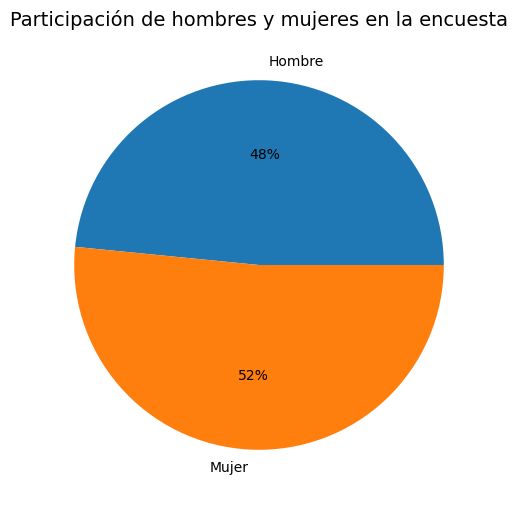

In [564]:
plt.figure(figsize=(8,6))
data = personas.groupby(['sexo'])['PONDERA'].sum()/ total_personas
labels = ['Hombre','Mujer']
plt.pie(data, labels= labels,autopct='%.0f%%')
plt.title("Participación de hombres y mujeres en la encuesta", fontsize=14)

In [565]:
personas['nivel_aprobado'].value_counts() #Cantidad de personas por Nivel de Estudios Aprobado ( 1.Ninguno/Sin estudios, 2.primario, 3.secundario, 4. terciario, 5.universitario, 6. post universitario, 7. educación especial, 22.Otro)

3     13699
2     13256
1      7487
4      2505
5      2209
6       190
22      147
7        40
Name: nivel_aprobado, dtype: int64

In [566]:
personas['nivel_aprobado'].value_counts() / total_personas * 100 #Calculamos el porcentaje que representan

3     34.652063
2     33.531480
1     18.938608
4      6.336478
5      5.587737
6      0.480611
22     0.371841
7      0.101181
Name: nivel_aprobado, dtype: float64

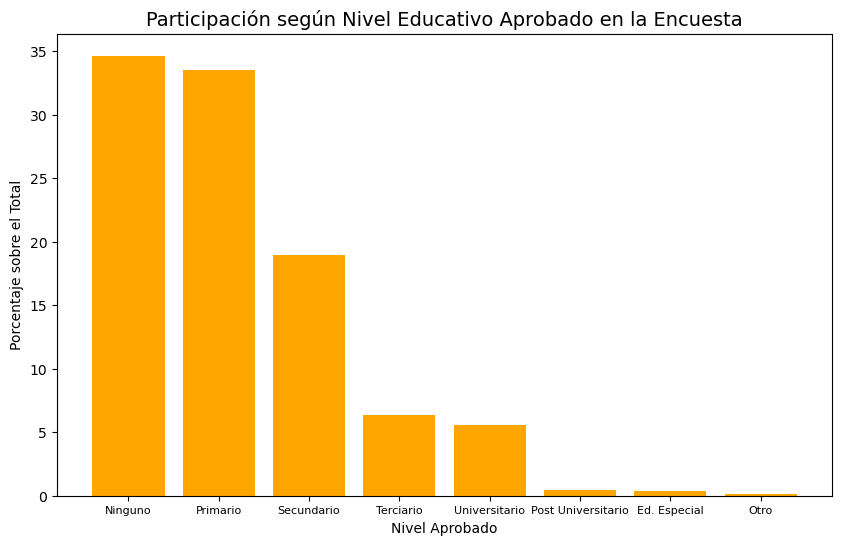

In [567]:
categorias = ['Ninguno','Primario','Secundario','Terciario','Universitario','Post Universitario','Ed. Especial','Otro']
data1 = personas['nivel_aprobado'].value_counts() / total_personas*100
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categorias, data1, color='Orange')
ax.set_title('Participación según Nivel Educativo Aprobado en la Encuesta', fontsize=14)
ax.set_xlabel('Nivel Aprobado')
ax.set_ylabel('Porcentaje sobre el Total')
ax.tick_params(axis='x', labelsize=8)
plt.show()


In [568]:
personas['Trabaja_Si_No (0=SD)'].value_counts() #Cantidad de personas que trabajan ( 1=si, 2=NO)

2    24086
1    15447
Name: Trabaja_Si_No (0=SD), dtype: int64

In [569]:
cantidad_hogares=hogar.shape[0]
cantidad_hogares

16667

In [570]:
hogar['vivienda'].value_counts() #Cuántas viviendas de cada tipo hay (1.Casas, 2. Rancho, 3.Casilla, 4.Departamento PH, 5.Piezas en inquilinato o conventillo 6.Pieza de hotel familiar y/o pensión, 7.Construccion no destinada a vivienda, 22.Otro)


1     13552
4      2564
2       194
3       192
5        93
6        46
22       23
7         3
Name: vivienda, dtype: int64

In [571]:
hogar['tiene_vehiculos_motorizados'].value_counts() #Cantidad de hogares que tiene vehículos motorizados (1.Si, 2.No)

2    10352
1     6315
Name: tiene_vehiculos_motorizados, dtype: int64

In [572]:
hogar['tiene_bicis'].value_counts() #Cantidad de hogares que tienen bicicletas (1.Si, 2.No)

2    12321
1     4346
Name: tiene_bicis, dtype: int64

In [573]:
viajes['distancia_viaje_km'].mean() #Calculamos el promedio de kilómetros que hacen las personas que viajan

5.087027611543519

In [574]:
viajes['duracion_minutos'].mean() #Calculamos el promedio de minutos que viajan las personas.

30.582280241269622

## Visualización de Datos

Creamos una Base de Datos de la cantidad de viajes para cruzar con los datos de personas.

In [575]:
qviajes=viajes.groupby(['id_hogar','id_persona'])['id_viaje'].value_counts() #Filtramos cantidad de viajes por id_personas, ide_hogar y id_viajes

In [576]:
qviajes

id_hogar  id_persona  id_viaje
1         2           1           1
                      2           1
2         1           1           1
                      2           1
3         1           1           1
                                 ..
16204     1           2           1
16207     1           1           1
                      2           1
                      3           1
                      4           1
Name: id_viaje, Length: 57529, dtype: int64

In [577]:
qviajes.to_csv('../datos/qviajes.csv') #Convertimos el filtro anterior en un archivo ".csv"

In [578]:
qvjs=pd.read_csv('../datos/qviajes.csv') #Leemos el archivo creado anteriormente


In [579]:
qvjs

,id_hogar,id_persona,id_viaje,id_viaje.1
0,1,2,1,1
1,1,2,2,1
2,2,1,1,1
3,2,1,2,1
4,3,1,1,1
...,...,...,...,...
57524,16204,1,2,1
57525,16207,1,1,1
57526,16207,1,2,1
57527,16207,1,3,1


In [580]:
Viaje_p=qvjs.groupby(['id_hogar','id_persona'])['id_viaje.1'].sum() #Sumamos la cantidad de viajes realizados por cada persona

In [581]:
Viaje_p

id_hogar  id_persona
1         2             2
2         1             2
3         1             2
4         1             1
          2             2
                       ..
15822     1             2
16007     1             2
16203     1             2
16204     1             2
16207     1             4
Name: id_viaje.1, Length: 25604, dtype: int64

In [582]:
Viaje_p.to_csv('../datos/qviajes_P.csv') #Convertimos el filtro anterior en un archivo ".csv"

In [583]:
qvjs_p=pd.read_csv('../datos/qviajes_P.csv') #Leemos el archivo creado anteriormente

In [584]:
qvjs_p.describe()

,id_hogar,id_persona,id_viaje.1
count,25604.000000,25604.000000,25604.000000
mean,7435.293157,2.038392,2.246875
std,4569.751065,1.293527,0.808609
min,1.000000,1.000000,1.000000
25%,3477.750000,1.000000,2.000000
50%,7114.500000,2.000000,2.000000
75%,11358.000000,3.000000,2.000000
max,16207.000000,11.000000,14.000000


Se determina que la máxima cantidad de viajes realizados por una persona son 14 y la mínima, 1 viaje, siempre considerando que la pregunta toma el rango semanal.

A continuación se unificarán las Bases de Datos de Hogares y Personas, a una base llamada "mov" y a continuación se le anexará la de viajes "qvjs_p".

In [585]:
mov = pd.merge(personas ,hogar ,left_on='id_hogar',right_on='id_hogar') #Unimos la Base de Datos "Personas" con la de "Hogar"

In [586]:
mov1 = pd.merge(mov ,qvjs_p ,left_on=['id_persona','id_hogar'],right_on=['id_persona','id_hogar']) #Unimos la Base de Datos "Mov" con la de "Qviajes"

In [587]:
mov1

,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,nivel_cursando,...,moto_1_uso,moto_2_propietario,moto_2_uso,moto_3_propietario,moto_3_uso,moto_4_propietario,moto_4_uso,tiene_bicis,cuantas_bicis,id_viaje.1
0,1,2,6119,BRANDSEN,64.0,1,2,7,2,0,...,0,0,0,0,0,0,0,2,0,2
1,3,1,6119,BRANDSEN,59.0,1,1,7,2,0,...,0,0,0,0,0,0,0,2,0,2
2,4,2,6119,BRANDSEN,14.0,1,3,7,1,4,...,0,0,0,0,0,0,0,2,0,2
3,5,3,6119,BRANDSEN,28.0,2,3,7,2,0,...,2,0,0,0,0,0,0,1,1,3
4,6,1,6119,BRANDSEN,64.0,1,1,7,2,0,...,0,0,0,0,0,0,0,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23892,15822,1,2001,COMUNA 1,71.0,1,1,7,2,0,...,0,0,0,0,0,0,0,1,1,2
23893,16007,1,6760,SAN MIGUEL,69.0,2,1,7,2,0,...,0,0,0,0,0,0,0,2,0,2
23894,16203,1,2001,COMUNA 1,56.0,2,1,1,2,0,...,0,0,0,0,0,0,0,2,0,2
23895,16204,1,2001,COMUNA 1,38.0,1,1,7,2,0,...,0,0,0,0,0,0,0,2,0,2


In [588]:
personas_viajan= mov1.shape[0] #Calculamos la cantidad de personas del total de la población encuestada que viajan
personas_viajan

23897

In [589]:
(personas_viajan *100)/total_personas #Calculamos el porcentaje de la población encuestada que viaja

60.4482331216958

In [590]:
mov1.columns #Visualizamos la columnas del nuevo dataset

Index(['id_hogar', 'id_persona', 'partido', 'nombre_partido', 'edad', 'sexo',
       'relacion_con_jefe_de_hogar', 'dificultad', 'cursa_actualmente',
       'nivel_cursando', 'ambito_cursando', 'nivel_aprobado',
       'Trabaja_Si_No (0=SD)', 'situacion_laboral', 'por_que_no_trabajo',
       'por_que_no_trabajo_otro', 'por_que_no_tiene_empleo_remunerado',
       'por_que_no_tiene_empleo_otro', 'trabaja_como', 'forma_aporte',
       'ambito_laboral', 'ambito_laboral_otro', 'cobertura', 'lugar_atencion',
       'licencia_de_conducir', 'viajo_ayer', 'motivos_no_viajo_ayer',
       'PONDERA', 'provincia_hogar', 'partido_hogar', 'radio_censal_hogar',
       'vivienda', 'lugar_vivienda', 'cantidad_habitaciones', 'bano',
       'personas_habituales', 'personas_temporal',
       'tiene_vehiculos_motorizados', 'cuantos_vehiculos_motorizados',
       'cocheras', 'vehiculo_1_tipo', 'vehiculo_1_propietario',
       'vehiculo_1_uso', 'vehiculo_1_combustible', 'vehiculo_2_tipo',
       'vehiculo_2_p

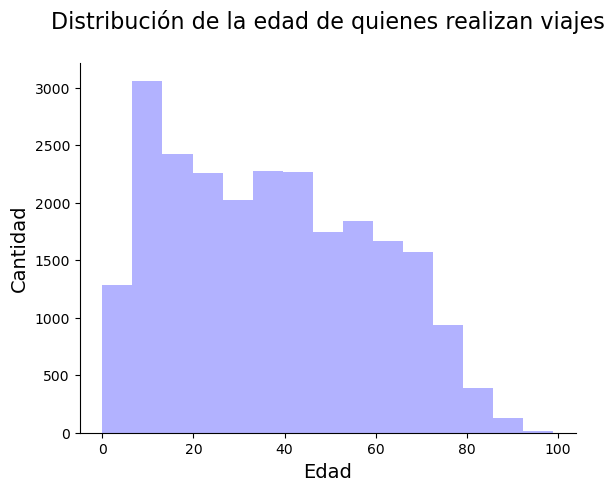

In [591]:
# Histograma Edad (Encuestados)
plt.figure()
plt.hist(mov1['edad'], bins=15, color="blue", alpha=0.3)
#El método dropna permite, de una forma muy conveniente, filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.
plt.ylabel("Cantidad", size=14)
plt.xlabel("Edad", size=14)
plt.title("Distribución de la edad de quienes realizan viajes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show() #no olvidarse que lo plotea

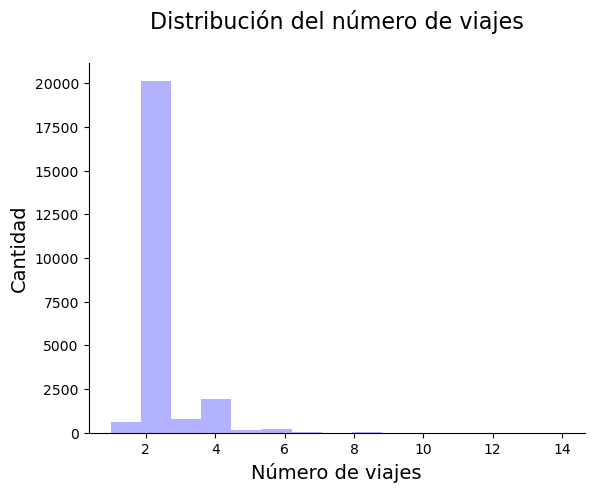

In [592]:
# Grafico Viajes (Encuestados)
plt.figure()
plt.hist(mov1['id_viaje.1'], bins=15, color="blue", alpha=0.3)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Número de viajes", size=14)
plt.title("Distribución del número de viajes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

Estandarizamos la variable "EDAD".

In [593]:
from sklearn.preprocessing import StandardScaler

In [594]:
scaler = StandardScaler()

In [595]:
mov1['edad'] =  scaler.fit_transform(mov1[['edad']])

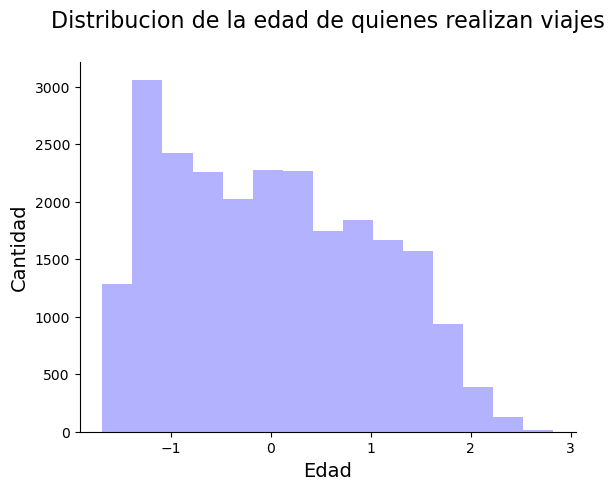

In [596]:
# Histograma Edad (Encuestados)
plt.figure()
plt.hist(mov1['edad'], bins=15, color="blue", alpha=0.3)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Edad", size=14)
plt.title("Distribucion de la edad de quienes realizan viajes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

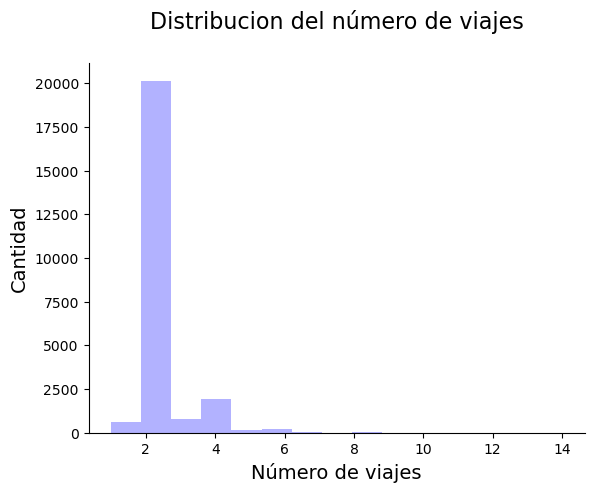

In [597]:
# Grafico Viajes (Encuestados)
plt.figure()
plt.hist(mov1['id_viaje.1'], bins=15, color="blue", alpha=0.3)
#El método dropna permite, de una forma muy conveniente, filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.
plt.ylabel("Cantidad", size=14)
plt.xlabel("Número de viajes", size=14)
plt.title("Distribucion del número de viajes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show() #no olvidarse que lo plotea

Aplicamos re-escalado a la variable "id:viaje.1"

In [598]:
from sklearn.preprocessing import MinMaxScaler

In [599]:
scaler = MinMaxScaler(feature_range=(0,1), copy=True)

In [600]:
mov1['id_viaje.1'] = scaler.fit_transform(mov1[['id_viaje.1']])

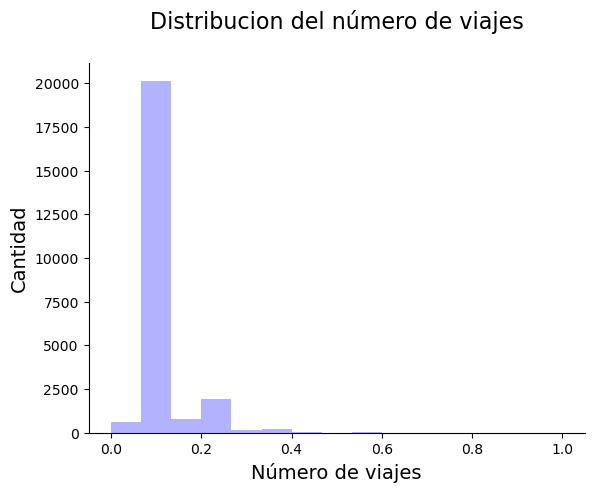

In [601]:
# Grafico Viajes (Encuestados)
plt.figure()
plt.hist(mov1['id_viaje.1'], bins=15, color="blue", alpha=0.3)
#El método dropna permite, de una forma muy conveniente, filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.
plt.ylabel("Cantidad", size=14)
plt.xlabel("Número de viajes", size=14)
plt.title("Distribucion del número de viajes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show() #no olvidarse que lo plotea

Se observa una concentración en 2 viajes (valor modal)

In [602]:
#viajes por partido
Viajes_partido = mov1.nombre_partido.value_counts().reset_index().rename(columns={'nombre_partido':'Count','index':'nombre_partido'})

In [603]:
Viaj_part = mov1.groupby(['nombre_partido'])[['id_viaje.1']].sum()

In [604]:
top_viajes_pdos = pd.merge(Viajes_partido, Viaj_part, on='nombre_partido')
top_viajes_pdos.head(5)

,nombre_partido,Count,id_viaje.1
0,LA MATANZA,2731,279.000000
1,LA PLATA,1266,113.307692
2,QUILMES,1205,122.769231
3,LOMAS DE ZAMORA,1092,99.846154
4,MERLO,1085,102.615385


In [605]:
top10_viajes_pdos = top_viajes_pdos.head(10).sort_values(by = ['id_viaje.1'],ascending = False)

In [606]:
top10_viajes_pdos.columns

Index(['nombre_partido', 'Count', 'id_viaje.1'], dtype='object')

In [607]:
top10_viajes_pdos.rename(columns={"id_viaje.1": "Q_viaj"}, inplace=True)

<Axes: title={'center': 'Top 10 viajes por partido'}, xlabel='nombre_partido', ylabel='Q_viaj'>

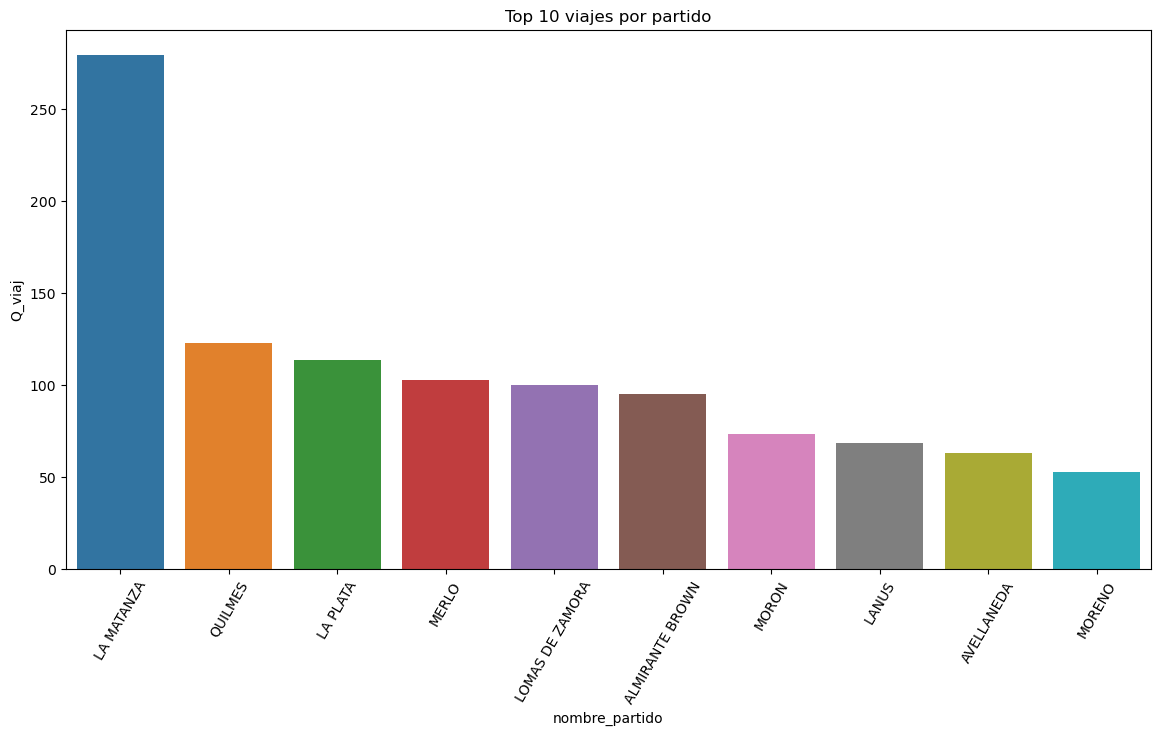

In [608]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Nombre Partido")
plt.ylabel("Número de viajes")
plt.title("Top 10 viajes por partido")
sns.barplot(x = top10_viajes_pdos.nombre_partido, y = top10_viajes_pdos.Q_viaj)

Analizando los partidos de procedencia de las personas y la cantidad de viajes realizados, se observa que quienes realizan viajes se movilizan principalmente desde La Matanza, Quilmes y La Plata.
El primer resultado era esperable dada la magnitud poblacional del municipio.

**Visualización de todos los partidos en función de la cantidad de viajes**

In [609]:
top_viajes_pdos.rename(columns={"id_viaje.1": "Cantidad_viaje"}, inplace=True)

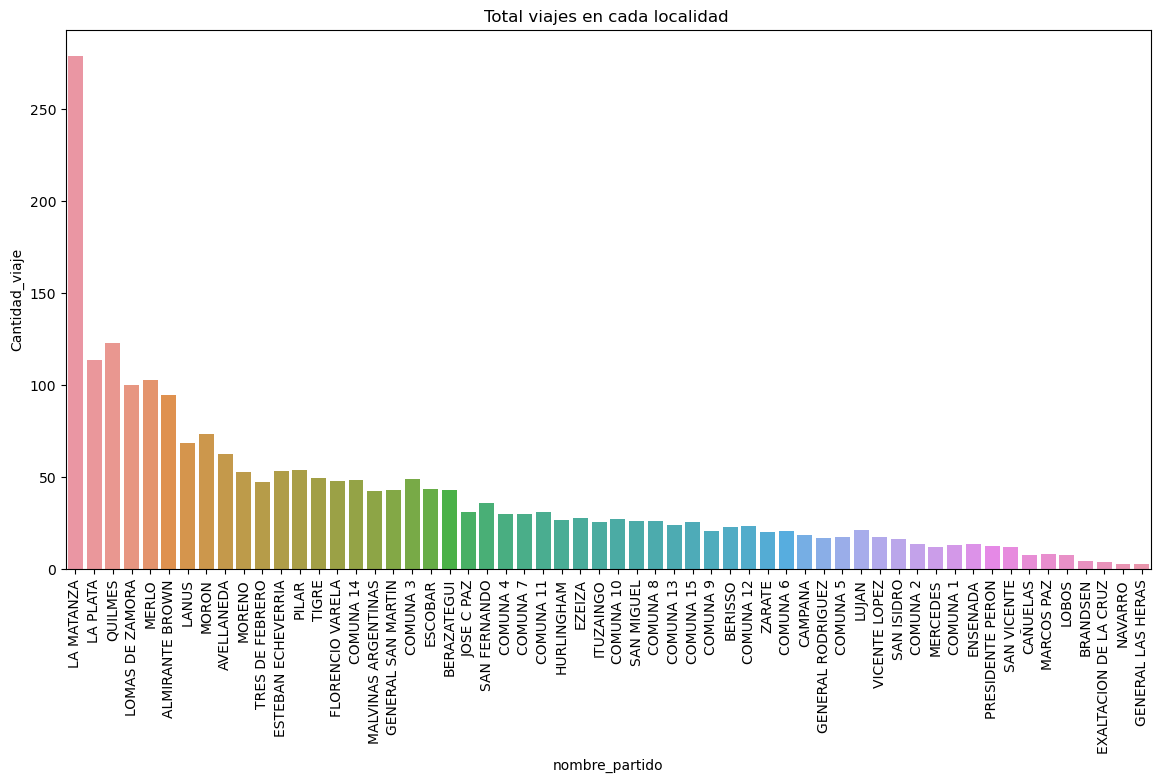

In [610]:
#No lee las labels
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel('nombre_partido')
plt.ylabel('Cantidad de viajes')
plt.title("Total viajes en cada localidad ")
sns.barplot(x = top_viajes_pdos.nombre_partido, y = top_viajes_pdos.Cantidad_viaje)
plt.show()

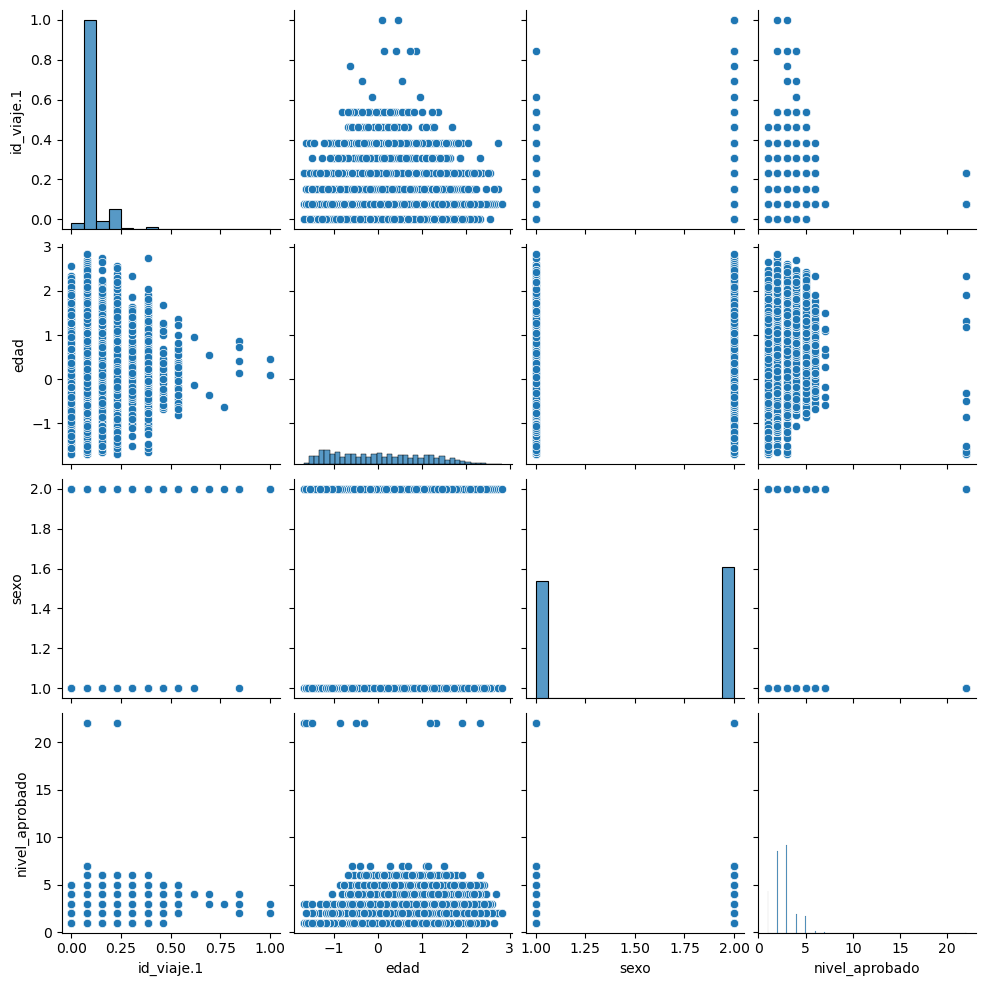

In [611]:
#Vinculos entre cantidad de viajes, edad, sexo y nivel educativo
sns.pairplot(mov1[["id_viaje.1","edad","sexo","nivel_aprobado"]])
plt.show()

In [612]:
mov1.rename(columns={"id_viaje.1": "Cantidad_viaje"}, inplace=True)

<Axes: title={'center': 'Viajes por sexo'}, xlabel='sexo', ylabel='Cantidad_viaje'>

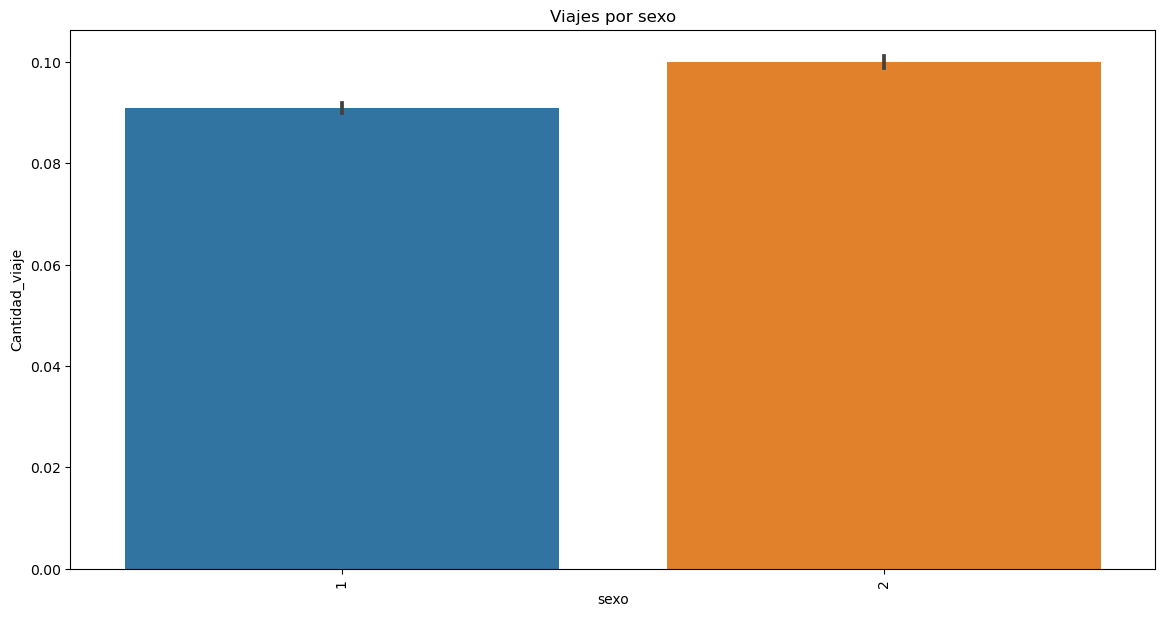

In [613]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Sexo")
plt.ylabel("Número de viajes")
plt.title("Viajes por sexo")
sns.barplot(x = mov1.sexo,y = mov1.Cantidad_viaje)

<Axes: title={'center': 'Viajes según condición laboral'}, xlabel='situacion_laboral', ylabel='Cantidad_viaje'>

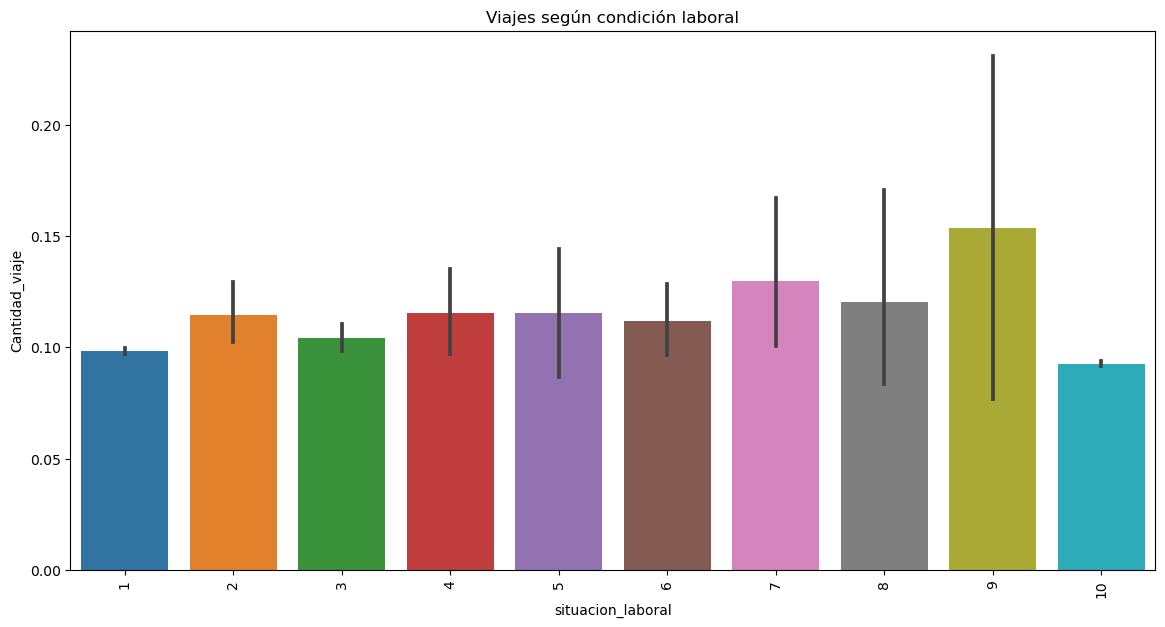

In [614]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Condición laboral")
plt.ylabel("Número de viajes")
plt.title("Viajes según condición laboral")
sns.barplot(x = mov1.situacion_laboral,y = mov1.Cantidad_viaje)

La situación laboral de quienes realizan mayor cantidad de viajes es que trabajan al menos una hora (2), o tiene un trabajo al que no concurrió (7).

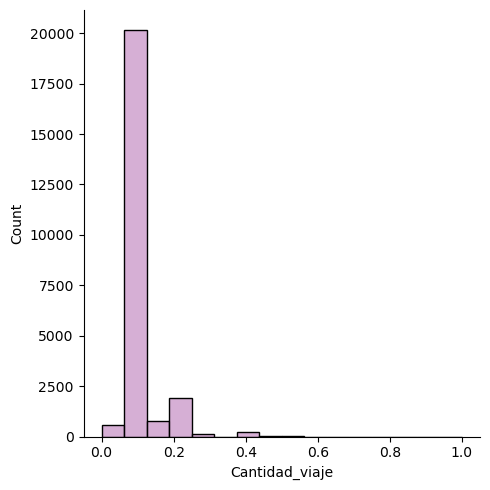

In [615]:
#Se observa la distribución de la cantidad de viajes realizados, los kilómetros recorridos y su duración a través del ploteo de la distribución y diagrama de cajas.
sns.displot(mov1['Cantidad_viaje'], color='#c994c7')
sns.despine()

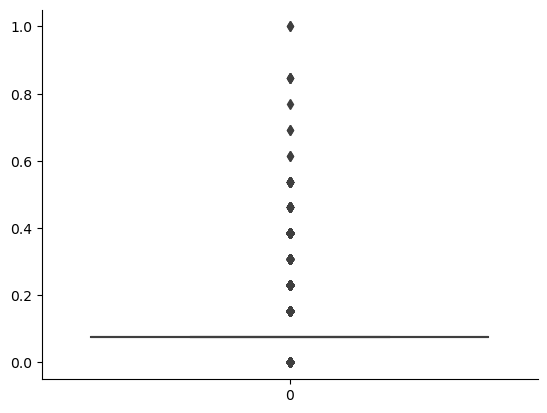

In [616]:
sns.boxplot(mov1['Cantidad_viaje'])
sns.despine()

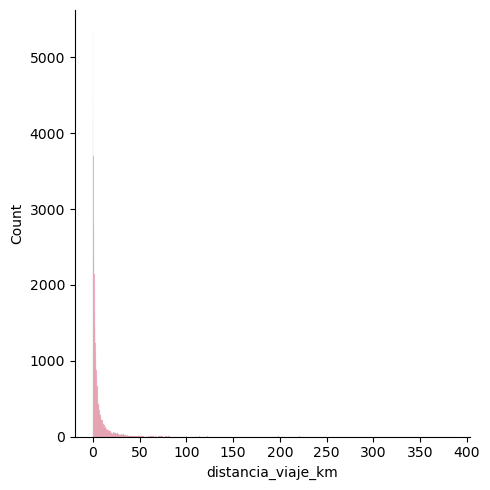

In [617]:
sns.displot(viajes['distancia_viaje_km'], color='#fa9fb5')
sns.despine()

In [618]:
viajes['distancia_viaje_km'] = scaler.fit_transform(viajes[['distancia_viaje_km']])

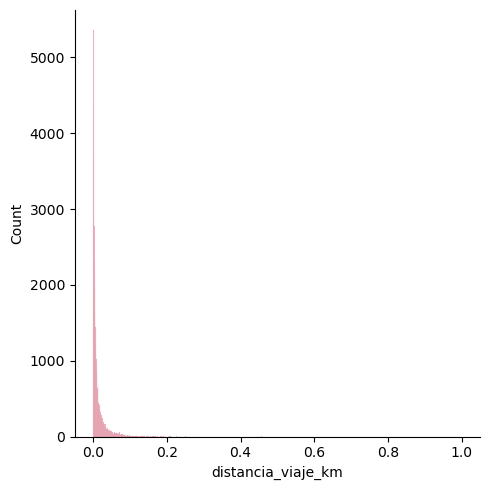

In [619]:
sns.displot(viajes['distancia_viaje_km'], color='#fa9fb5')
sns.despine()

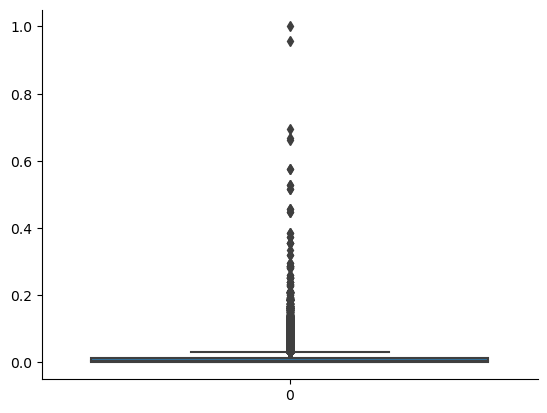

In [620]:
sns.boxplot(viajes['distancia_viaje_km'])
sns.despine()

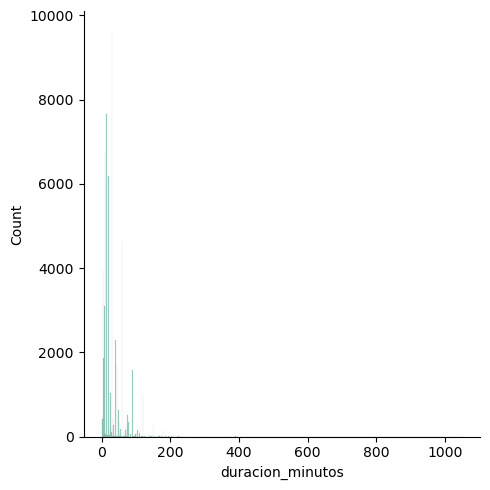

In [621]:
sns.displot(viajes['duracion_minutos'], color='#7fcdbb')
sns.despine()

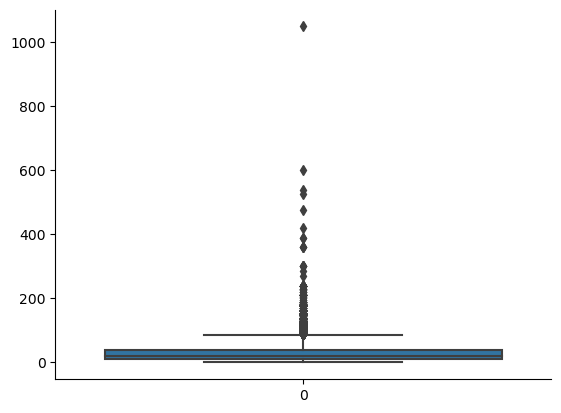

In [622]:
sns.boxplot(viajes['duracion_minutos'])
sns.despine()

In [623]:
viajes.isna().sum()

id_hogar                   0
id_persona                 0
id_viaje                   0
actividad_en_el_origen     0
actividad_en_el_destino    0
BH_NBH                     0
motivo                     0
veces_por_semana_viaja     0
tarifa_combinada           0
jur_origen                 0
jur_destino                0
partido_origen_viaje       0
partido_destino_viaje      0
cod_partido_origen         0
cod_partido_destino        0
hora_inicio                0
hora_final                 0
duracion_minutos           0
modo_des                   0
PONDERA                    0
cantidad_etapas            0
tipo_viaje                 0
menos_2_cuadras            0
Inluye_bici                0
viaja_rmba                 0
distancia_viaje_km         0
dtype: int64

In [624]:
viajes.to_csv('../datos/viajes_l.csv')

In [625]:
personas.to_csv('../datos/personas_l.csv')